# Stereoisomer testing on ChiENN - enantiomers/diastereomers (multiple centers)

## Importing section

In [1]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
import sys
sys.path.append("../../../../")

from ptgnn.features.chienn.molecule3d import smiles_to_3d_mol
from ptgnn.features.chienn.mol_to_data import mol_to_data
from ptgnn.transform import edge_graph_transform, vertex_graph_transform

## Define SMILES strings

In [2]:
smiles_list = [
    "O=C[C@](O)([H])[C@]([H])(O)CO",
    # "OC[C@](O)([H])[C@]([H])(O)C=O",
    
    "O=C[C@@](O)([H])[C@]([H])(O)CO",
    # "OC[C@](O)([H])[C@@]([H])(O)C=O",
    
    "O=C[C@](O)([H])[C@@]([H])(O)CO",
    # "OC[C@@](O)([H])[C@]([H])(O)C=O",
    
    "O=C[C@@](O)([H])[C@@]([H])(O)CO",
    # "OC[C@@](O)([H])[C@@]([H])(O)C=O",
]

In [3]:
smiles_list = [
    "CN[C@H]1C[C@H](c2ccc(Cl)c(Cl)c2)c2ccccc21",
    "CN[C@H]1C[C@@H](c2ccc(Cl)c(Cl)c2)c2ccccc21",
    "CN[C@@H]1C[C@H](c2ccc(Cl)c(Cl)c2)c2ccccc21",
    "CN[C@@H]1C[C@@H](c2ccc(Cl)c(Cl)c2)c2ccccc21"
]

## Visualize and confirm stereomer classification (E/Z)

In [4]:
def showAndChiral(smiles):
    mol = Chem.MolFromSmiles(smiles)
    display(mol)
    print(AllChem.FindMolChiralCenters(mol))
    for bond in mol.GetBonds():
        if bond.GetBondType() == Chem.rdchem.BondType.DOUBLE:
            print("Bond", bond.GetIdx(), "stereo:", bond.GetStereo())

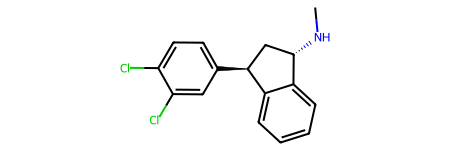

[(2, 'S'), (4, 'R')]


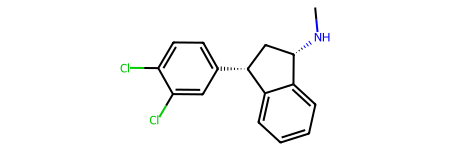

[(2, 'S'), (4, 'S')]


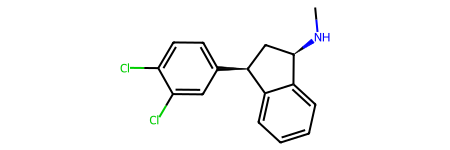

[(2, 'R'), (4, 'R')]


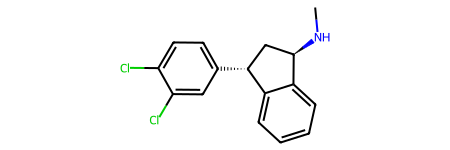

[(2, 'R'), (4, 'S')]


In [5]:
for smile in smiles_list:
    showAndChiral(smile)

##  Convert to (edge) graph with ptree

In [6]:
# get molecules
mol_list = [
    smiles_to_3d_mol(
        smiles,
        max_number_of_attempts=100,
        max_number_of_atoms=100
    )
    for smiles in smiles_list
]

In [7]:
data_list = [
    mol_to_data(mol)
    for mol in mol_list
]

In [8]:
data_list = [
    edge_graph_transform(
        data,
        transformation_mode="permutation_tree",
        mol=mol,
        transformation_parameters={
            'k':  3,
            'tetrahedral_chiral': False,
            'chiral_center_selective': False,
            'chiral_center_select_potential': False,
            'multi_stereo_center_dia': True,
            'separate_tree': False
        }
    )
    for data, mol in zip(data_list, mol_list)
]

In [9]:
d = data_list[0]
display(d.ptree, d.initial_map)
for i in range(d.num_layer):
    display(f"layer: {i}")
    display(d[f"layer{i}_order_matrix"], d[f"layer{i}_type_mask"], d[f"layer{i}_pooling"])

['{"S": [0, 1, {"P": [3, 7, 5]}]}',
 '{"S": [1, 0, {"P": [9, 11]}]}',
 '{"S": [2, 3, {"P": [1, 5, 7]}]}',
 '{"S": [3, 2]}',
 '{"S": [4, 5, {"P": [1, 7, 3]}]}',
 '{"S": [5, 4]}',
 '{"S": [6, 7, {"P": [1, 3, 5]}]}',
 '{"S": [7, 6]}',
 '{"S": [8, 9, {"P": [0, 11]}]}',
 '{"S": [9, 8, {"P": [13, 15, 17]}]}',
 '{"S": [10, 11, {"P": [0, 9]}]}',
 '{"S": [11, 10]}',
 '{"S": [12, 13, {"P": [8, 17, 15]}]}',
 '{"S": [13, 12, {"P": [19, 23, 21]}]}',
 '{"S": [14, 15, {"P": [8, 13, 17]}]}',
 '{"S": [15, 14, {"P": [54, 68]}]}',
 '{"S": [16, 17, {"P": [8, 15, 13]}]}',
 '{"S": [17, 16]}',
 '{"S": [18, 19, {"P": [12, 21, 23]}]}',
 '{"S": [19, 18, {"P": [25, 29, 27]}]}',
 '{"S": [20, 21, {"P": [12, 23, 19]}]}',
 '{"S": [21, 20]}',
 '{"S": [22, 23, {"P": [12, 19, 21]}]}',
 '{"S": [23, 22]}',
 '{"S": [24, 25, {"P": [18, 27, 29]}]}',
 '{"S": [25, 24, {"P": [31, 33]}]}',
 '{"S": [26, 27, {"P": [18, 29, 25]}]}',
 '{"S": [27, 26, {"P": [53, 55]}]}',
 '{"S": [28, 29, {"P": [18, 25, 27]}]}',
 '{"S": [29, 28]}',
 

tensor([ 0,  1,  3,  7,  5,  1,  0,  9, 11,  2,  3,  1,  5,  7,  3,  2,  4,  5,
         1,  7,  3,  5,  4,  6,  7,  1,  3,  5,  7,  6,  8,  9,  0, 11,  9,  8,
        13, 15, 17, 10, 11,  0,  9, 11, 10, 12, 13,  8, 17, 15, 13, 12, 19, 23,
        21, 14, 15,  8, 13, 17, 15, 14, 54, 68, 16, 17,  8, 15, 13, 17, 16, 18,
        19, 12, 21, 23, 19, 18, 25, 29, 27, 20, 21, 12, 23, 19, 21, 20, 22, 23,
        12, 19, 21, 23, 22, 24, 25, 18, 27, 29, 25, 24, 31, 33, 26, 27, 18, 29,
        25, 27, 26, 53, 55, 28, 29, 18, 25, 27, 29, 28, 30, 31, 24, 33, 31, 30,
        35, 37, 32, 33, 24, 31, 33, 32, 48, 51, 34, 35, 30, 37, 35, 34, 39, 41,
        36, 37, 30, 35, 37, 36, 38, 39, 34, 41, 39, 38, 43, 45, 40, 41, 34, 39,
        41, 40, 42, 43, 38, 45, 43, 42, 44, 45, 38, 43, 45, 44, 47, 49, 46, 47,
        44, 49, 47, 46, 48, 49, 44, 47, 49, 48, 32, 51, 50, 51, 32, 48, 51, 50,
        52, 53, 26, 55, 53, 52, 57, 59, 54, 55, 26, 53, 55, 54, 14, 68, 56, 57,
        52, 59, 57, 56, 61, 63, 58, 59, 

'layer: 0'

[[tensor([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
            14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
            28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
            42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
            56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
            70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
            84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
            98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
           112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
           126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
           140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
           154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
           168, 169, 170, 17

[[tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])]]

[[tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
           14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
           28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
           42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
           56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
           70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
           84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
           98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
          112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
          126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
          140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
          154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
          168, 169, 170, 171, 172, 173, 

'layer: 1'

[[tensor([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
            14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
            28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
            42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
            56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
            70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
            84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
            98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
           112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
           126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
           140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
           154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
           168, 169, 170, 17

[[tensor([0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
          0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
          1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
          0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
          0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
          0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
          0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
          0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
          0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
          1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
          0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
          0, 0, 1, 1, 0, 0, 1, 1, 1, 1])]]

[[tensor([  0,   1,   2,   2,   2,   3,   4,   5,   5,   6,   7,   8,   8,   8,
            9,  10,  11,  12,  13,  13,  13,  14,  15,  16,  17,  18,  18,  18,
           19,  20,  21,  22,  23,  23,  24,  25,  26,  26,  26,  27,  28,  29,
           29,  30,  31,  32,  33,  34,  34,  34,  35,  36,  37,  37,  37,  38,
           39,  40,  40,  40,  41,  42,  43,  43,  44,  45,  46,  46,  46,  47,
           48,  49,  50,  51,  51,  51,  52,  53,  54,  54,  54,  55,  56,  57,
           57,  57,  58,  59,  60,  61,  62,  62,  62,  63,  64,  65,  66,  67,
           67,  67,  68,  69,  70,  70,  71,  72,  73,  73,  73,  74,  75,  76,
           76,  77,  78,  79,  79,  79,  80,  81,  82,  83,  84,  84,  85,  86,
           87,  87,  88,  89,  90,  90,  91,  92,  93,  93,  94,  95,  96,  96,
           97,  98,  99,  99, 100, 101, 102, 102, 103, 104, 105, 106, 107, 107,
          108, 109, 110, 110, 111, 112, 113, 113, 114, 115, 116, 117, 118, 118,
          119, 120, 121, 122, 123, 123, 

'layer: 2'

[[tensor([[  0,  -1,  -1,   3,  -1,  -1,   6,  -1,  -1,   9,  -1,  11,  -1,  -1,
            14,  -1,  16,  -1,  -1,  19,  -1,  21,  -1,  -1,  24,  -1,  -1,  27,
            -1,  -1,  30,  -1,  32,  -1,  -1,  35,  -1,  -1,  38,  -1,  -1,  41,
            -1,  -1,  44,  -1,  -1,  47,  -1,  49,  -1,  -1,  52,  -1,  -1,  55,
            -1,  -1,  58,  -1,  60,  -1,  -1,  63,  -1,  65,  -1,  -1,  68,  -1,
            -1,  71,  -1,  -1,  74,  -1,  -1,  77,  -1,  -1,  80,  -1,  82,  -1,
            -1,  85,  -1,  -1,  88,  -1,  -1,  91,  -1,  -1,  94,  -1,  -1,  97,
            -1,  -1, 100,  -1,  -1, 103,  -1, 105,  -1,  -1, 108,  -1,  -1, 111,
            -1,  -1, 114,  -1, 116,  -1,  -1, 119,  -1, 121,  -1,  -1, 124,  -1,
            -1, 127,  -1,  -1, 130,  -1, 132,  -1,  -1, 135,  -1,  -1, 138,  -1,
            -1, 141,  -1, 143,  -1,  -1, 146,  -1,  -1, 149,  -1,  -1, 152,  -1,
            -1, 155,  -1,  -1, 158,  -1,  -1, 161,  -1,  -1, 164,  -1, 166,  -1,
            -1, 169,  -1,  -

[[tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
          3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
          3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
          3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
          3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
          3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
          3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
          3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
          3, 3, 3, 3, 3, 3, 3, 1, 1])]]

[[tensor([ 0,  0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  4,  4,  4,  5,  5,  6,  6,
           6,  7,  7,  8,  8,  8,  9,  9,  9, 10, 10, 10, 11, 11, 12, 12, 12, 13,
          13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 18, 18, 18, 19, 19,
          19, 20, 20, 20, 21, 21, 22, 22, 22, 23, 23, 24, 24, 24, 25, 25, 25, 26,
          26, 26, 27, 27, 27, 28, 28, 28, 29, 29, 30, 30, 30, 31, 31, 31, 32, 32,
          32, 33, 33, 33, 34, 34, 34, 35, 35, 35, 36, 36, 36, 37, 37, 38, 38, 38,
          39, 39, 39, 40, 40, 40, 41, 41, 42, 42, 42, 43, 43, 44, 44, 44, 45, 45,
          45, 46, 46, 46, 47, 47, 48, 48, 48, 49, 49, 49, 50, 50, 50, 51, 51, 52,
          52, 52, 53, 53, 53, 54, 54, 54, 55, 55, 55, 56, 56, 56, 57, 57, 57, 58,
          58, 58, 59, 59, 60, 60, 60, 61, 61, 61, 62, 62, 62, 63, 63, 64, 64, 64,
          65, 65, 65, 66, 66, 66, 67, 67, 68, 68, 68, 69, 69, 69, 70, 70, 70, 71,
          71, 72, 72])]]

In [10]:
for data in data_list:
    print(data)
    print(data.ptree)

Data(x=[73, 93], edge_index=[2, 198], edge_attr=[198, 57], pos=[72, 6], parallel_node_index=[72], circle_index=[72], ptree=[73], initial_map=[282], layer0_order_matrix=[1], layer0_type_mask=[1], layer0_pooling=[1], num_layer=3, layer1_order_matrix=[1], layer1_type_mask=[1], layer1_pooling=[1], layer2_order_matrix=[1], layer2_type_mask=[1], layer2_pooling=[1])
['{"S": [0, 1, {"P": [3, 7, 5]}]}', '{"S": [1, 0, {"P": [9, 11]}]}', '{"S": [2, 3, {"P": [1, 5, 7]}]}', '{"S": [3, 2]}', '{"S": [4, 5, {"P": [1, 7, 3]}]}', '{"S": [5, 4]}', '{"S": [6, 7, {"P": [1, 3, 5]}]}', '{"S": [7, 6]}', '{"S": [8, 9, {"P": [0, 11]}]}', '{"S": [9, 8, {"P": [13, 15, 17]}]}', '{"S": [10, 11, {"P": [0, 9]}]}', '{"S": [11, 10]}', '{"S": [12, 13, {"P": [8, 17, 15]}]}', '{"S": [13, 12, {"P": [19, 23, 21]}]}', '{"S": [14, 15, {"P": [8, 13, 17]}]}', '{"S": [15, 14, {"P": [54, 68]}]}', '{"S": [16, 17, {"P": [8, 15, 13]}]}', '{"S": [17, 16]}', '{"S": [18, 19, {"P": [12, 21, 23]}]}', '{"S": [19, 18, {"P": [25, 29, 27]}]}

## Create Model

In [11]:
from ptgnn.model.modules.ptree.recursive_simple_ptree_layer import RecursiveSimplePtreeLayer
from ptgnn.model.modules.ptree.advanced_tree_layer import AdvancedPermutationTreeLayer

k = 3

model = AdvancedPermutationTreeLayer(
    hidden_dim=93,
    k=k,
    apply_p_elu=True
    # batch_norm=True
)

## Create batches

In [12]:
from ptgnn.loading.collate import permutation_tree_collation

batch_list = [
    permutation_tree_collation([data])
    for data in data_list
]

In [13]:
for idx, batch in enumerate(batch_list):
    display(f"Batch: {idx}")
    display(batch.ptree)
    display(batch.initial_map)
    for layer_idx in range(batch.num_layer):
        display(f"Layer: {layer_idx}")
        display(
            batch[f"layer{layer_idx}_order_matrix"],
            batch[f"layer{layer_idx}_type_mask"],
            batch[f"layer{layer_idx}_pooling"]
        )

'Batch: 0'

['{"S": [0, 1, {"P": [3, 7, 5]}]}',
 '{"S": [1, 0, {"P": [9, 11]}]}',
 '{"S": [2, 3, {"P": [1, 5, 7]}]}',
 '{"S": [3, 2]}',
 '{"S": [4, 5, {"P": [1, 7, 3]}]}',
 '{"S": [5, 4]}',
 '{"S": [6, 7, {"P": [1, 3, 5]}]}',
 '{"S": [7, 6]}',
 '{"S": [8, 9, {"P": [0, 11]}]}',
 '{"S": [9, 8, {"P": [13, 15, 17]}]}',
 '{"S": [10, 11, {"P": [0, 9]}]}',
 '{"S": [11, 10]}',
 '{"S": [12, 13, {"P": [8, 17, 15]}]}',
 '{"S": [13, 12, {"P": [19, 23, 21]}]}',
 '{"S": [14, 15, {"P": [8, 13, 17]}]}',
 '{"S": [15, 14, {"P": [54, 68]}]}',
 '{"S": [16, 17, {"P": [8, 15, 13]}]}',
 '{"S": [17, 16]}',
 '{"S": [18, 19, {"P": [12, 21, 23]}]}',
 '{"S": [19, 18, {"P": [25, 29, 27]}]}',
 '{"S": [20, 21, {"P": [12, 23, 19]}]}',
 '{"S": [21, 20]}',
 '{"S": [22, 23, {"P": [12, 19, 21]}]}',
 '{"S": [23, 22]}',
 '{"S": [24, 25, {"P": [18, 27, 29]}]}',
 '{"S": [25, 24, {"P": [31, 33]}]}',
 '{"S": [26, 27, {"P": [18, 29, 25]}]}',
 '{"S": [27, 26, {"P": [53, 55]}]}',
 '{"S": [28, 29, {"P": [18, 25, 27]}]}',
 '{"S": [29, 28]}',
 

tensor([ 0,  1,  3,  7,  5,  1,  0,  9, 11,  2,  3,  1,  5,  7,  3,  2,  4,  5,
         1,  7,  3,  5,  4,  6,  7,  1,  3,  5,  7,  6,  8,  9,  0, 11,  9,  8,
        13, 15, 17, 10, 11,  0,  9, 11, 10, 12, 13,  8, 17, 15, 13, 12, 19, 23,
        21, 14, 15,  8, 13, 17, 15, 14, 54, 68, 16, 17,  8, 15, 13, 17, 16, 18,
        19, 12, 21, 23, 19, 18, 25, 29, 27, 20, 21, 12, 23, 19, 21, 20, 22, 23,
        12, 19, 21, 23, 22, 24, 25, 18, 27, 29, 25, 24, 31, 33, 26, 27, 18, 29,
        25, 27, 26, 53, 55, 28, 29, 18, 25, 27, 29, 28, 30, 31, 24, 33, 31, 30,
        35, 37, 32, 33, 24, 31, 33, 32, 48, 51, 34, 35, 30, 37, 35, 34, 39, 41,
        36, 37, 30, 35, 37, 36, 38, 39, 34, 41, 39, 38, 43, 45, 40, 41, 34, 39,
        41, 40, 42, 43, 38, 45, 43, 42, 44, 45, 38, 43, 45, 44, 47, 49, 46, 47,
        44, 49, 47, 46, 48, 49, 44, 47, 49, 48, 32, 51, 50, 51, 32, 48, 51, 50,
        52, 53, 26, 55, 53, 52, 57, 59, 54, 55, 26, 53, 55, 54, 14, 68, 56, 57,
        52, 59, 57, 56, 61, 63, 58, 59, 

'Layer: 0'

tensor([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
          28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
          42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
          56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
          70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
          84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
          98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
         112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
         126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
         140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
         154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
         168, 169, 170, 171, 172, 173, 174, 175, 176

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
         42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
         70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
         98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
        112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
        140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
        154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 1

'Layer: 1'

tensor([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
          28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
          42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
          56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
          70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
          84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
          98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
         112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
         126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
         140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
         154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
         168, 169, 170, 171, 172, 173, 174, 175, 176

tensor([0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 1, 1, 1])

tensor([  0,   1,   2,   2,   2,   3,   4,   5,   5,   6,   7,   8,   8,   8,
          9,  10,  11,  12,  13,  13,  13,  14,  15,  16,  17,  18,  18,  18,
         19,  20,  21,  22,  23,  23,  24,  25,  26,  26,  26,  27,  28,  29,
         29,  30,  31,  32,  33,  34,  34,  34,  35,  36,  37,  37,  37,  38,
         39,  40,  40,  40,  41,  42,  43,  43,  44,  45,  46,  46,  46,  47,
         48,  49,  50,  51,  51,  51,  52,  53,  54,  54,  54,  55,  56,  57,
         57,  57,  58,  59,  60,  61,  62,  62,  62,  63,  64,  65,  66,  67,
         67,  67,  68,  69,  70,  70,  71,  72,  73,  73,  73,  74,  75,  76,
         76,  77,  78,  79,  79,  79,  80,  81,  82,  83,  84,  84,  85,  86,
         87,  87,  88,  89,  90,  90,  91,  92,  93,  93,  94,  95,  96,  96,
         97,  98,  99,  99, 100, 101, 102, 102, 103, 104, 105, 106, 107, 107,
        108, 109, 110, 110, 111, 112, 113, 113, 114, 115, 116, 117, 118, 118,
        119, 120, 121, 122, 123, 123, 124, 125, 126, 126, 127, 1

'Layer: 2'

tensor([[  0,  -1,  -1,   3,  -1,  -1,   6,  -1,  -1,   9,  -1,  11,  -1,  -1,
          14,  -1,  16,  -1,  -1,  19,  -1,  21,  -1,  -1,  24,  -1,  -1,  27,
          -1,  -1,  30,  -1,  32,  -1,  -1,  35,  -1,  -1,  38,  -1,  -1,  41,
          -1,  -1,  44,  -1,  -1,  47,  -1,  49,  -1,  -1,  52,  -1,  -1,  55,
          -1,  -1,  58,  -1,  60,  -1,  -1,  63,  -1,  65,  -1,  -1,  68,  -1,
          -1,  71,  -1,  -1,  74,  -1,  -1,  77,  -1,  -1,  80,  -1,  82,  -1,
          -1,  85,  -1,  -1,  88,  -1,  -1,  91,  -1,  -1,  94,  -1,  -1,  97,
          -1,  -1, 100,  -1,  -1, 103,  -1, 105,  -1,  -1, 108,  -1,  -1, 111,
          -1,  -1, 114,  -1, 116,  -1,  -1, 119,  -1, 121,  -1,  -1, 124,  -1,
          -1, 127,  -1,  -1, 130,  -1, 132,  -1,  -1, 135,  -1,  -1, 138,  -1,
          -1, 141,  -1, 143,  -1,  -1, 146,  -1,  -1, 149,  -1,  -1, 152,  -1,
          -1, 155,  -1,  -1, 158,  -1,  -1, 161,  -1,  -1, 164,  -1, 166,  -1,
          -1, 169,  -1,  -1, 172,  -1,  -1, 175,  -1

tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 1, 1])

tensor([ 0,  0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  4,  4,  4,  5,  5,  6,  6,
         6,  7,  7,  8,  8,  8,  9,  9,  9, 10, 10, 10, 11, 11, 12, 12, 12, 13,
        13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 18, 18, 18, 19, 19,
        19, 20, 20, 20, 21, 21, 22, 22, 22, 23, 23, 24, 24, 24, 25, 25, 25, 26,
        26, 26, 27, 27, 27, 28, 28, 28, 29, 29, 30, 30, 30, 31, 31, 31, 32, 32,
        32, 33, 33, 33, 34, 34, 34, 35, 35, 35, 36, 36, 36, 37, 37, 38, 38, 38,
        39, 39, 39, 40, 40, 40, 41, 41, 42, 42, 42, 43, 43, 44, 44, 44, 45, 45,
        45, 46, 46, 46, 47, 47, 48, 48, 48, 49, 49, 49, 50, 50, 50, 51, 51, 52,
        52, 52, 53, 53, 53, 54, 54, 54, 55, 55, 55, 56, 56, 56, 57, 57, 57, 58,
        58, 58, 59, 59, 60, 60, 60, 61, 61, 61, 62, 62, 62, 63, 63, 64, 64, 64,
        65, 65, 65, 66, 66, 66, 67, 67, 68, 68, 68, 69, 69, 69, 70, 70, 70, 71,
        71, 72, 72])

'Batch: 1'

['{"S": [0, 1, {"P": [3, 7, 5]}]}',
 '{"S": [1, 0, {"P": [9, 11]}]}',
 '{"S": [2, 3, {"P": [1, 5, 7]}]}',
 '{"S": [3, 2]}',
 '{"S": [4, 5, {"P": [1, 7, 3]}]}',
 '{"S": [5, 4]}',
 '{"S": [6, 7, {"P": [1, 3, 5]}]}',
 '{"S": [7, 6]}',
 '{"S": [8, 9, {"P": [0, 11]}]}',
 '{"S": [9, 8, {"P": [13, 15, 17]}]}',
 '{"S": [10, 11, {"P": [0, 9]}]}',
 '{"S": [11, 10]}',
 '{"S": [12, 13, {"P": [8, 17, 15]}]}',
 '{"S": [13, 12, {"P": [19, 23, 21]}]}',
 '{"S": [14, 15, {"P": [8, 13, 17]}]}',
 '{"S": [15, 14, {"P": [54, 68]}]}',
 '{"S": [16, 17, {"P": [8, 15, 13]}]}',
 '{"S": [17, 16]}',
 '{"S": [18, 19, {"P": [12, 21, 23]}]}',
 '{"S": [19, 18, {"P": [25, 27, 29]}]}',
 '{"S": [20, 21, {"P": [12, 23, 19]}]}',
 '{"S": [21, 20]}',
 '{"S": [22, 23, {"P": [12, 19, 21]}]}',
 '{"S": [23, 22]}',
 '{"S": [24, 25, {"P": [18, 29, 27]}]}',
 '{"S": [25, 24, {"P": [31, 33]}]}',
 '{"S": [26, 27, {"P": [18, 25, 29]}]}',
 '{"S": [27, 26, {"P": [53, 55]}]}',
 '{"S": [28, 29, {"P": [18, 27, 25]}]}',
 '{"S": [29, 28]}',
 

tensor([ 0,  1,  3,  7,  5,  1,  0,  9, 11,  2,  3,  1,  5,  7,  3,  2,  4,  5,
         1,  7,  3,  5,  4,  6,  7,  1,  3,  5,  7,  6,  8,  9,  0, 11,  9,  8,
        13, 15, 17, 10, 11,  0,  9, 11, 10, 12, 13,  8, 17, 15, 13, 12, 19, 23,
        21, 14, 15,  8, 13, 17, 15, 14, 54, 68, 16, 17,  8, 15, 13, 17, 16, 18,
        19, 12, 21, 23, 19, 18, 25, 27, 29, 20, 21, 12, 23, 19, 21, 20, 22, 23,
        12, 19, 21, 23, 22, 24, 25, 18, 29, 27, 25, 24, 31, 33, 26, 27, 18, 25,
        29, 27, 26, 53, 55, 28, 29, 18, 27, 25, 29, 28, 30, 31, 24, 33, 31, 30,
        35, 37, 32, 33, 24, 31, 33, 32, 48, 51, 34, 35, 30, 37, 35, 34, 39, 41,
        36, 37, 30, 35, 37, 36, 38, 39, 34, 41, 39, 38, 43, 45, 40, 41, 34, 39,
        41, 40, 42, 43, 38, 45, 43, 42, 44, 45, 38, 43, 45, 44, 47, 49, 46, 47,
        44, 49, 47, 46, 48, 49, 44, 47, 49, 48, 32, 51, 50, 51, 32, 48, 51, 50,
        52, 53, 26, 55, 53, 52, 57, 59, 54, 55, 26, 53, 55, 54, 14, 68, 56, 57,
        52, 59, 57, 56, 61, 63, 58, 59, 

'Layer: 0'

tensor([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
          28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
          42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
          56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
          70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
          84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
          98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
         112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
         126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
         140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
         154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
         168, 169, 170, 171, 172, 173, 174, 175, 176

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
         42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
         70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
         98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
        112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
        140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
        154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 1

'Layer: 1'

tensor([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
          28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
          42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
          56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
          70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
          84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
          98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
         112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
         126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
         140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
         154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
         168, 169, 170, 171, 172, 173, 174, 175, 176

tensor([0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 1, 1, 1])

tensor([  0,   1,   2,   2,   2,   3,   4,   5,   5,   6,   7,   8,   8,   8,
          9,  10,  11,  12,  13,  13,  13,  14,  15,  16,  17,  18,  18,  18,
         19,  20,  21,  22,  23,  23,  24,  25,  26,  26,  26,  27,  28,  29,
         29,  30,  31,  32,  33,  34,  34,  34,  35,  36,  37,  37,  37,  38,
         39,  40,  40,  40,  41,  42,  43,  43,  44,  45,  46,  46,  46,  47,
         48,  49,  50,  51,  51,  51,  52,  53,  54,  54,  54,  55,  56,  57,
         57,  57,  58,  59,  60,  61,  62,  62,  62,  63,  64,  65,  66,  67,
         67,  67,  68,  69,  70,  70,  71,  72,  73,  73,  73,  74,  75,  76,
         76,  77,  78,  79,  79,  79,  80,  81,  82,  83,  84,  84,  85,  86,
         87,  87,  88,  89,  90,  90,  91,  92,  93,  93,  94,  95,  96,  96,
         97,  98,  99,  99, 100, 101, 102, 102, 103, 104, 105, 106, 107, 107,
        108, 109, 110, 110, 111, 112, 113, 113, 114, 115, 116, 117, 118, 118,
        119, 120, 121, 122, 123, 123, 124, 125, 126, 126, 127, 1

'Layer: 2'

tensor([[  0,  -1,  -1,   3,  -1,  -1,   6,  -1,  -1,   9,  -1,  11,  -1,  -1,
          14,  -1,  16,  -1,  -1,  19,  -1,  21,  -1,  -1,  24,  -1,  -1,  27,
          -1,  -1,  30,  -1,  32,  -1,  -1,  35,  -1,  -1,  38,  -1,  -1,  41,
          -1,  -1,  44,  -1,  -1,  47,  -1,  49,  -1,  -1,  52,  -1,  -1,  55,
          -1,  -1,  58,  -1,  60,  -1,  -1,  63,  -1,  65,  -1,  -1,  68,  -1,
          -1,  71,  -1,  -1,  74,  -1,  -1,  77,  -1,  -1,  80,  -1,  82,  -1,
          -1,  85,  -1,  -1,  88,  -1,  -1,  91,  -1,  -1,  94,  -1,  -1,  97,
          -1,  -1, 100,  -1,  -1, 103,  -1, 105,  -1,  -1, 108,  -1,  -1, 111,
          -1,  -1, 114,  -1, 116,  -1,  -1, 119,  -1, 121,  -1,  -1, 124,  -1,
          -1, 127,  -1,  -1, 130,  -1, 132,  -1,  -1, 135,  -1,  -1, 138,  -1,
          -1, 141,  -1, 143,  -1,  -1, 146,  -1,  -1, 149,  -1,  -1, 152,  -1,
          -1, 155,  -1,  -1, 158,  -1,  -1, 161,  -1,  -1, 164,  -1, 166,  -1,
          -1, 169,  -1,  -1, 172,  -1,  -1, 175,  -1

tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 1, 1])

tensor([ 0,  0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  4,  4,  4,  5,  5,  6,  6,
         6,  7,  7,  8,  8,  8,  9,  9,  9, 10, 10, 10, 11, 11, 12, 12, 12, 13,
        13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 18, 18, 18, 19, 19,
        19, 20, 20, 20, 21, 21, 22, 22, 22, 23, 23, 24, 24, 24, 25, 25, 25, 26,
        26, 26, 27, 27, 27, 28, 28, 28, 29, 29, 30, 30, 30, 31, 31, 31, 32, 32,
        32, 33, 33, 33, 34, 34, 34, 35, 35, 35, 36, 36, 36, 37, 37, 38, 38, 38,
        39, 39, 39, 40, 40, 40, 41, 41, 42, 42, 42, 43, 43, 44, 44, 44, 45, 45,
        45, 46, 46, 46, 47, 47, 48, 48, 48, 49, 49, 49, 50, 50, 50, 51, 51, 52,
        52, 52, 53, 53, 53, 54, 54, 54, 55, 55, 55, 56, 56, 56, 57, 57, 57, 58,
        58, 58, 59, 59, 60, 60, 60, 61, 61, 61, 62, 62, 62, 63, 63, 64, 64, 64,
        65, 65, 65, 66, 66, 66, 67, 67, 68, 68, 68, 69, 69, 69, 70, 70, 70, 71,
        71, 72, 72])

'Batch: 2'

['{"S": [0, 1, {"P": [3, 5, 7]}]}',
 '{"S": [1, 0, {"P": [9, 11]}]}',
 '{"S": [2, 3, {"P": [1, 7, 5]}]}',
 '{"S": [3, 2]}',
 '{"S": [4, 5, {"P": [1, 3, 7]}]}',
 '{"S": [5, 4]}',
 '{"S": [6, 7, {"P": [1, 5, 3]}]}',
 '{"S": [7, 6]}',
 '{"S": [8, 9, {"P": [0, 11]}]}',
 '{"S": [9, 8, {"P": [13, 17, 15]}]}',
 '{"S": [10, 11, {"P": [0, 9]}]}',
 '{"S": [11, 10]}',
 '{"S": [12, 13, {"P": [8, 15, 17]}]}',
 '{"S": [13, 12, {"P": [19, 21, 23]}]}',
 '{"S": [14, 15, {"P": [8, 17, 13]}]}',
 '{"S": [15, 14, {"P": [54, 68]}]}',
 '{"S": [16, 17, {"P": [8, 13, 15]}]}',
 '{"S": [17, 16]}',
 '{"S": [18, 19, {"P": [12, 23, 21]}]}',
 '{"S": [19, 18, {"P": [25, 29, 27]}]}',
 '{"S": [20, 21, {"P": [12, 19, 23]}]}',
 '{"S": [21, 20]}',
 '{"S": [22, 23, {"P": [12, 21, 19]}]}',
 '{"S": [23, 22]}',
 '{"S": [24, 25, {"P": [18, 27, 29]}]}',
 '{"S": [25, 24, {"P": [31, 33]}]}',
 '{"S": [26, 27, {"P": [18, 29, 25]}]}',
 '{"S": [27, 26, {"P": [53, 55]}]}',
 '{"S": [28, 29, {"P": [18, 25, 27]}]}',
 '{"S": [29, 28]}',
 

tensor([ 0,  1,  3,  5,  7,  1,  0,  9, 11,  2,  3,  1,  7,  5,  3,  2,  4,  5,
         1,  3,  7,  5,  4,  6,  7,  1,  5,  3,  7,  6,  8,  9,  0, 11,  9,  8,
        13, 17, 15, 10, 11,  0,  9, 11, 10, 12, 13,  8, 15, 17, 13, 12, 19, 21,
        23, 14, 15,  8, 17, 13, 15, 14, 54, 68, 16, 17,  8, 13, 15, 17, 16, 18,
        19, 12, 23, 21, 19, 18, 25, 29, 27, 20, 21, 12, 19, 23, 21, 20, 22, 23,
        12, 21, 19, 23, 22, 24, 25, 18, 27, 29, 25, 24, 31, 33, 26, 27, 18, 29,
        25, 27, 26, 53, 55, 28, 29, 18, 25, 27, 29, 28, 30, 31, 24, 33, 31, 30,
        35, 37, 32, 33, 24, 31, 33, 32, 48, 51, 34, 35, 30, 37, 35, 34, 39, 41,
        36, 37, 30, 35, 37, 36, 38, 39, 34, 41, 39, 38, 43, 45, 40, 41, 34, 39,
        41, 40, 42, 43, 38, 45, 43, 42, 44, 45, 38, 43, 45, 44, 47, 49, 46, 47,
        44, 49, 47, 46, 48, 49, 44, 47, 49, 48, 32, 51, 50, 51, 32, 48, 51, 50,
        52, 53, 26, 55, 53, 52, 57, 59, 54, 55, 26, 53, 55, 54, 14, 68, 56, 57,
        52, 59, 57, 56, 61, 63, 58, 59, 

'Layer: 0'

tensor([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
          28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
          42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
          56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
          70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
          84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
          98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
         112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
         126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
         140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
         154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
         168, 169, 170, 171, 172, 173, 174, 175, 176

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
         42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
         70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
         98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
        112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
        140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
        154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 1

'Layer: 1'

tensor([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
          28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
          42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
          56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
          70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
          84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
          98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
         112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
         126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
         140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
         154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
         168, 169, 170, 171, 172, 173, 174, 175, 176

tensor([0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 1, 1, 1])

tensor([  0,   1,   2,   2,   2,   3,   4,   5,   5,   6,   7,   8,   8,   8,
          9,  10,  11,  12,  13,  13,  13,  14,  15,  16,  17,  18,  18,  18,
         19,  20,  21,  22,  23,  23,  24,  25,  26,  26,  26,  27,  28,  29,
         29,  30,  31,  32,  33,  34,  34,  34,  35,  36,  37,  37,  37,  38,
         39,  40,  40,  40,  41,  42,  43,  43,  44,  45,  46,  46,  46,  47,
         48,  49,  50,  51,  51,  51,  52,  53,  54,  54,  54,  55,  56,  57,
         57,  57,  58,  59,  60,  61,  62,  62,  62,  63,  64,  65,  66,  67,
         67,  67,  68,  69,  70,  70,  71,  72,  73,  73,  73,  74,  75,  76,
         76,  77,  78,  79,  79,  79,  80,  81,  82,  83,  84,  84,  85,  86,
         87,  87,  88,  89,  90,  90,  91,  92,  93,  93,  94,  95,  96,  96,
         97,  98,  99,  99, 100, 101, 102, 102, 103, 104, 105, 106, 107, 107,
        108, 109, 110, 110, 111, 112, 113, 113, 114, 115, 116, 117, 118, 118,
        119, 120, 121, 122, 123, 123, 124, 125, 126, 126, 127, 1

'Layer: 2'

tensor([[  0,  -1,  -1,   3,  -1,  -1,   6,  -1,  -1,   9,  -1,  11,  -1,  -1,
          14,  -1,  16,  -1,  -1,  19,  -1,  21,  -1,  -1,  24,  -1,  -1,  27,
          -1,  -1,  30,  -1,  32,  -1,  -1,  35,  -1,  -1,  38,  -1,  -1,  41,
          -1,  -1,  44,  -1,  -1,  47,  -1,  49,  -1,  -1,  52,  -1,  -1,  55,
          -1,  -1,  58,  -1,  60,  -1,  -1,  63,  -1,  65,  -1,  -1,  68,  -1,
          -1,  71,  -1,  -1,  74,  -1,  -1,  77,  -1,  -1,  80,  -1,  82,  -1,
          -1,  85,  -1,  -1,  88,  -1,  -1,  91,  -1,  -1,  94,  -1,  -1,  97,
          -1,  -1, 100,  -1,  -1, 103,  -1, 105,  -1,  -1, 108,  -1,  -1, 111,
          -1,  -1, 114,  -1, 116,  -1,  -1, 119,  -1, 121,  -1,  -1, 124,  -1,
          -1, 127,  -1,  -1, 130,  -1, 132,  -1,  -1, 135,  -1,  -1, 138,  -1,
          -1, 141,  -1, 143,  -1,  -1, 146,  -1,  -1, 149,  -1,  -1, 152,  -1,
          -1, 155,  -1,  -1, 158,  -1,  -1, 161,  -1,  -1, 164,  -1, 166,  -1,
          -1, 169,  -1,  -1, 172,  -1,  -1, 175,  -1

tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 1, 1])

tensor([ 0,  0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  4,  4,  4,  5,  5,  6,  6,
         6,  7,  7,  8,  8,  8,  9,  9,  9, 10, 10, 10, 11, 11, 12, 12, 12, 13,
        13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 18, 18, 18, 19, 19,
        19, 20, 20, 20, 21, 21, 22, 22, 22, 23, 23, 24, 24, 24, 25, 25, 25, 26,
        26, 26, 27, 27, 27, 28, 28, 28, 29, 29, 30, 30, 30, 31, 31, 31, 32, 32,
        32, 33, 33, 33, 34, 34, 34, 35, 35, 35, 36, 36, 36, 37, 37, 38, 38, 38,
        39, 39, 39, 40, 40, 40, 41, 41, 42, 42, 42, 43, 43, 44, 44, 44, 45, 45,
        45, 46, 46, 46, 47, 47, 48, 48, 48, 49, 49, 49, 50, 50, 50, 51, 51, 52,
        52, 52, 53, 53, 53, 54, 54, 54, 55, 55, 55, 56, 56, 56, 57, 57, 57, 58,
        58, 58, 59, 59, 60, 60, 60, 61, 61, 61, 62, 62, 62, 63, 63, 64, 64, 64,
        65, 65, 65, 66, 66, 66, 67, 67, 68, 68, 68, 69, 69, 69, 70, 70, 70, 71,
        71, 72, 72])

'Batch: 3'

['{"S": [0, 1, {"P": [3, 7, 5]}]}',
 '{"S": [1, 0, {"P": [9, 11]}]}',
 '{"S": [2, 3, {"P": [1, 5, 7]}]}',
 '{"S": [3, 2]}',
 '{"S": [4, 5, {"P": [1, 7, 3]}]}',
 '{"S": [5, 4]}',
 '{"S": [6, 7, {"P": [1, 3, 5]}]}',
 '{"S": [7, 6]}',
 '{"S": [8, 9, {"P": [0, 11]}]}',
 '{"S": [9, 8, {"P": [13, 17, 15]}]}',
 '{"S": [10, 11, {"P": [0, 9]}]}',
 '{"S": [11, 10]}',
 '{"S": [12, 13, {"P": [8, 15, 17]}]}',
 '{"S": [13, 12, {"P": [19, 21, 23]}]}',
 '{"S": [14, 15, {"P": [8, 17, 13]}]}',
 '{"S": [15, 14, {"P": [54, 68]}]}',
 '{"S": [16, 17, {"P": [8, 13, 15]}]}',
 '{"S": [17, 16]}',
 '{"S": [18, 19, {"P": [12, 23, 21]}]}',
 '{"S": [19, 18, {"P": [25, 27, 29]}]}',
 '{"S": [20, 21, {"P": [12, 19, 23]}]}',
 '{"S": [21, 20]}',
 '{"S": [22, 23, {"P": [12, 21, 19]}]}',
 '{"S": [23, 22]}',
 '{"S": [24, 25, {"P": [18, 29, 27]}]}',
 '{"S": [25, 24, {"P": [31, 33]}]}',
 '{"S": [26, 27, {"P": [18, 25, 29]}]}',
 '{"S": [27, 26, {"P": [53, 55]}]}',
 '{"S": [28, 29, {"P": [18, 27, 25]}]}',
 '{"S": [29, 28]}',
 

tensor([ 0,  1,  3,  7,  5,  1,  0,  9, 11,  2,  3,  1,  5,  7,  3,  2,  4,  5,
         1,  7,  3,  5,  4,  6,  7,  1,  3,  5,  7,  6,  8,  9,  0, 11,  9,  8,
        13, 17, 15, 10, 11,  0,  9, 11, 10, 12, 13,  8, 15, 17, 13, 12, 19, 21,
        23, 14, 15,  8, 17, 13, 15, 14, 54, 68, 16, 17,  8, 13, 15, 17, 16, 18,
        19, 12, 23, 21, 19, 18, 25, 27, 29, 20, 21, 12, 19, 23, 21, 20, 22, 23,
        12, 21, 19, 23, 22, 24, 25, 18, 29, 27, 25, 24, 31, 33, 26, 27, 18, 25,
        29, 27, 26, 53, 55, 28, 29, 18, 27, 25, 29, 28, 30, 31, 24, 33, 31, 30,
        35, 37, 32, 33, 24, 31, 33, 32, 48, 51, 34, 35, 30, 37, 35, 34, 39, 41,
        36, 37, 30, 35, 37, 36, 38, 39, 34, 41, 39, 38, 43, 45, 40, 41, 34, 39,
        41, 40, 42, 43, 38, 45, 43, 42, 44, 45, 38, 43, 45, 44, 47, 49, 46, 47,
        44, 49, 47, 46, 48, 49, 44, 47, 49, 48, 32, 51, 50, 51, 32, 48, 51, 50,
        52, 53, 26, 55, 53, 52, 57, 59, 54, 55, 26, 53, 55, 54, 14, 68, 56, 57,
        52, 59, 57, 56, 61, 63, 58, 59, 

'Layer: 0'

tensor([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
          28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
          42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
          56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
          70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
          84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
          98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
         112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
         126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
         140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
         154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
         168, 169, 170, 171, 172, 173, 174, 175, 176

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
         42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
         70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
         98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
        112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
        140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
        154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 1

'Layer: 1'

tensor([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
          28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
          42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
          56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
          70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
          84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
          98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
         112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
         126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
         140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
         154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
         168, 169, 170, 171, 172, 173, 174, 175, 176

tensor([0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 1, 1, 1])

tensor([  0,   1,   2,   2,   2,   3,   4,   5,   5,   6,   7,   8,   8,   8,
          9,  10,  11,  12,  13,  13,  13,  14,  15,  16,  17,  18,  18,  18,
         19,  20,  21,  22,  23,  23,  24,  25,  26,  26,  26,  27,  28,  29,
         29,  30,  31,  32,  33,  34,  34,  34,  35,  36,  37,  37,  37,  38,
         39,  40,  40,  40,  41,  42,  43,  43,  44,  45,  46,  46,  46,  47,
         48,  49,  50,  51,  51,  51,  52,  53,  54,  54,  54,  55,  56,  57,
         57,  57,  58,  59,  60,  61,  62,  62,  62,  63,  64,  65,  66,  67,
         67,  67,  68,  69,  70,  70,  71,  72,  73,  73,  73,  74,  75,  76,
         76,  77,  78,  79,  79,  79,  80,  81,  82,  83,  84,  84,  85,  86,
         87,  87,  88,  89,  90,  90,  91,  92,  93,  93,  94,  95,  96,  96,
         97,  98,  99,  99, 100, 101, 102, 102, 103, 104, 105, 106, 107, 107,
        108, 109, 110, 110, 111, 112, 113, 113, 114, 115, 116, 117, 118, 118,
        119, 120, 121, 122, 123, 123, 124, 125, 126, 126, 127, 1

'Layer: 2'

tensor([[  0,  -1,  -1,   3,  -1,  -1,   6,  -1,  -1,   9,  -1,  11,  -1,  -1,
          14,  -1,  16,  -1,  -1,  19,  -1,  21,  -1,  -1,  24,  -1,  -1,  27,
          -1,  -1,  30,  -1,  32,  -1,  -1,  35,  -1,  -1,  38,  -1,  -1,  41,
          -1,  -1,  44,  -1,  -1,  47,  -1,  49,  -1,  -1,  52,  -1,  -1,  55,
          -1,  -1,  58,  -1,  60,  -1,  -1,  63,  -1,  65,  -1,  -1,  68,  -1,
          -1,  71,  -1,  -1,  74,  -1,  -1,  77,  -1,  -1,  80,  -1,  82,  -1,
          -1,  85,  -1,  -1,  88,  -1,  -1,  91,  -1,  -1,  94,  -1,  -1,  97,
          -1,  -1, 100,  -1,  -1, 103,  -1, 105,  -1,  -1, 108,  -1,  -1, 111,
          -1,  -1, 114,  -1, 116,  -1,  -1, 119,  -1, 121,  -1,  -1, 124,  -1,
          -1, 127,  -1,  -1, 130,  -1, 132,  -1,  -1, 135,  -1,  -1, 138,  -1,
          -1, 141,  -1, 143,  -1,  -1, 146,  -1,  -1, 149,  -1,  -1, 152,  -1,
          -1, 155,  -1,  -1, 158,  -1,  -1, 161,  -1,  -1, 164,  -1, 166,  -1,
          -1, 169,  -1,  -1, 172,  -1,  -1, 175,  -1

tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 1, 1])

tensor([ 0,  0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  4,  4,  4,  5,  5,  6,  6,
         6,  7,  7,  8,  8,  8,  9,  9,  9, 10, 10, 10, 11, 11, 12, 12, 12, 13,
        13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 18, 18, 18, 19, 19,
        19, 20, 20, 20, 21, 21, 22, 22, 22, 23, 23, 24, 24, 24, 25, 25, 25, 26,
        26, 26, 27, 27, 27, 28, 28, 28, 29, 29, 30, 30, 30, 31, 31, 31, 32, 32,
        32, 33, 33, 33, 34, 34, 34, 35, 35, 35, 36, 36, 36, 37, 37, 38, 38, 38,
        39, 39, 39, 40, 40, 40, 41, 41, 42, 42, 42, 43, 43, 44, 44, 44, 45, 45,
        45, 46, 46, 46, 47, 47, 48, 48, 48, 49, 49, 49, 50, 50, 50, 51, 51, 52,
        52, 52, 53, 53, 53, 54, 54, 54, 55, 55, 55, 56, 56, 56, 57, 57, 57, 58,
        58, 58, 59, 59, 60, 60, 60, 61, 61, 61, 62, 62, 62, 63, 63, 64, 64, 64,
        65, 65, 65, 66, 66, 66, 67, 67, 68, 68, 68, 69, 69, 69, 70, 70, 70, 71,
        71, 72, 72])

In [14]:
# compare output
display(np.array(
    [
        [
            (batch_list[i].x == batch_list[j].x).all()
            for j in range(len(batch_list))
        ]
        for i in range(len(batch_list))
    ]
))

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

## Put batches through model

In [15]:
out_list = [
    model(batch)
    for batch in batch_list
]

In [16]:
out_list

[tensor([[ 4.0200e-01,  1.8387e-04, -3.5764e-02,  ..., -1.9010e-01,
           4.1127e-02,  7.1663e-02],
         [ 2.3141e-01,  6.3430e-02,  1.0669e-02,  ..., -2.4448e-01,
           1.7051e-02,  6.6492e-02],
         [ 2.8468e-01,  1.3049e-01,  1.1114e-01,  ..., -2.0585e-01,
           1.2647e-01,  7.4428e-02],
         ...,
         [ 2.3491e-01,  6.9013e-02,  3.3017e-01,  ..., -2.1862e-01,
           1.0056e-01,  1.4112e-01],
         [ 7.1103e-02,  6.6044e-02,  1.5621e-01,  ..., -1.4734e-01,
          -1.0334e-01, -6.9707e-02],
         [ 1.6089e-01, -5.7379e-02,  3.0846e-02,  ...,  2.2342e-01,
           4.8954e-02,  8.9731e-03]], grad_fn=<IndexPutBackward0>),
 tensor([[ 4.0200e-01,  1.8387e-04, -3.5764e-02,  ..., -1.9010e-01,
           4.1127e-02,  7.1663e-02],
         [ 2.3141e-01,  6.3430e-02,  1.0669e-02,  ..., -2.4448e-01,
           1.7051e-02,  6.6492e-02],
         [ 2.8468e-01,  1.3049e-01,  1.1114e-01,  ..., -2.0585e-01,
           1.2647e-01,  7.4428e-02],
         .

## Compare batches

In [17]:
# compare output
display(np.array(
    [
        [
            (out_list[i] == out_list[j]).all()
            for j in range(len(out_list))
        ]
        for i in range(len(out_list))
    ]
))

array([[ True, False, False, False],
       [False,  True, False, False],
       [False, False,  True, False],
       [False, False, False,  True]])

In [18]:
# compare sum pooled version itself
display(np.array(
    [
        [
            out_list[i].sum().item() - out_list[j].sum().item()
            for j in range(len(out_list))
        ]
        for i in range(len(out_list))
    ]
) == 0)

array([[ True, False, False, False],
       [False,  True, False, False],
       [False, False,  True, False],
       [False, False, False,  True]])

In [19]:
# compare output
display(np.array(
    [
        [
            (out_list[i] - out_list[j]).detach().abs().sum()
            for j in range(len(out_list))
        ]
        for i in range(len(out_list))
    ]
))

array([[0.0000000e+00, 2.7373713e-04, 2.7759955e-04, 1.8410850e-05],
       [2.7373713e-04, 0.0000000e+00, 1.8448802e-05, 2.7749268e-04],
       [2.7759955e-04, 1.8448802e-05, 0.0000000e+00, 2.7465331e-04],
       [1.8410850e-05, 2.7749268e-04, 2.7465331e-04, 0.0000000e+00]],
      dtype=float32)

Diastereomer difference is higher than enantiomer difference, however difference is small

# Batch norm

## Create Model

In [20]:
from ptgnn.model.modules.ptree.recursive_simple_ptree_layer import RecursiveSimplePtreeLayer
from ptgnn.model.modules.ptree.advanced_tree_layer import AdvancedPermutationTreeLayer

k = 3

model = AdvancedPermutationTreeLayer(
    hidden_dim=93,
    k=k,
    apply_p_elu=True
    # batch_norm=True
)

## Create batches

In [21]:
from ptgnn.loading.collate import permutation_tree_collation

batch_list = [
    permutation_tree_collation([data])
    for data in data_list
]

In [22]:
for idx, batch in enumerate(batch_list):
    display(f"Batch: {idx}")
    display(batch.ptree)
    display(batch.initial_map)
    for layer_idx in range(batch.num_layer):
        display(f"Layer: {layer_idx}")
        display(
            batch[f"layer{layer_idx}_order_matrix"],
            batch[f"layer{layer_idx}_type_mask"],
            batch[f"layer{layer_idx}_pooling"]
        )

'Batch: 0'

['{"S": [0, 1, {"P": [3, 7, 5]}]}',
 '{"S": [1, 0, {"P": [9, 11]}]}',
 '{"S": [2, 3, {"P": [1, 5, 7]}]}',
 '{"S": [3, 2]}',
 '{"S": [4, 5, {"P": [1, 7, 3]}]}',
 '{"S": [5, 4]}',
 '{"S": [6, 7, {"P": [1, 3, 5]}]}',
 '{"S": [7, 6]}',
 '{"S": [8, 9, {"P": [0, 11]}]}',
 '{"S": [9, 8, {"P": [13, 15, 17]}]}',
 '{"S": [10, 11, {"P": [0, 9]}]}',
 '{"S": [11, 10]}',
 '{"S": [12, 13, {"P": [8, 17, 15]}]}',
 '{"S": [13, 12, {"P": [19, 23, 21]}]}',
 '{"S": [14, 15, {"P": [8, 13, 17]}]}',
 '{"S": [15, 14, {"P": [54, 68]}]}',
 '{"S": [16, 17, {"P": [8, 15, 13]}]}',
 '{"S": [17, 16]}',
 '{"S": [18, 19, {"P": [12, 21, 23]}]}',
 '{"S": [19, 18, {"P": [25, 29, 27]}]}',
 '{"S": [20, 21, {"P": [12, 23, 19]}]}',
 '{"S": [21, 20]}',
 '{"S": [22, 23, {"P": [12, 19, 21]}]}',
 '{"S": [23, 22]}',
 '{"S": [24, 25, {"P": [18, 27, 29]}]}',
 '{"S": [25, 24, {"P": [31, 33]}]}',
 '{"S": [26, 27, {"P": [18, 29, 25]}]}',
 '{"S": [27, 26, {"P": [53, 55]}]}',
 '{"S": [28, 29, {"P": [18, 25, 27]}]}',
 '{"S": [29, 28]}',
 

tensor([ 0,  1,  3,  7,  5,  1,  0,  9, 11,  2,  3,  1,  5,  7,  3,  2,  4,  5,
         1,  7,  3,  5,  4,  6,  7,  1,  3,  5,  7,  6,  8,  9,  0, 11,  9,  8,
        13, 15, 17, 10, 11,  0,  9, 11, 10, 12, 13,  8, 17, 15, 13, 12, 19, 23,
        21, 14, 15,  8, 13, 17, 15, 14, 54, 68, 16, 17,  8, 15, 13, 17, 16, 18,
        19, 12, 21, 23, 19, 18, 25, 29, 27, 20, 21, 12, 23, 19, 21, 20, 22, 23,
        12, 19, 21, 23, 22, 24, 25, 18, 27, 29, 25, 24, 31, 33, 26, 27, 18, 29,
        25, 27, 26, 53, 55, 28, 29, 18, 25, 27, 29, 28, 30, 31, 24, 33, 31, 30,
        35, 37, 32, 33, 24, 31, 33, 32, 48, 51, 34, 35, 30, 37, 35, 34, 39, 41,
        36, 37, 30, 35, 37, 36, 38, 39, 34, 41, 39, 38, 43, 45, 40, 41, 34, 39,
        41, 40, 42, 43, 38, 45, 43, 42, 44, 45, 38, 43, 45, 44, 47, 49, 46, 47,
        44, 49, 47, 46, 48, 49, 44, 47, 49, 48, 32, 51, 50, 51, 32, 48, 51, 50,
        52, 53, 26, 55, 53, 52, 57, 59, 54, 55, 26, 53, 55, 54, 14, 68, 56, 57,
        52, 59, 57, 56, 61, 63, 58, 59, 

'Layer: 0'

tensor([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
          28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
          42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
          56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
          70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
          84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
          98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
         112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
         126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
         140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
         154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
         168, 169, 170, 171, 172, 173, 174, 175, 176

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
         42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
         70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
         98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
        112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
        140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
        154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 1

'Layer: 1'

tensor([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
          28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
          42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
          56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
          70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
          84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
          98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
         112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
         126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
         140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
         154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
         168, 169, 170, 171, 172, 173, 174, 175, 176

tensor([0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 1, 1, 1])

tensor([  0,   1,   2,   2,   2,   3,   4,   5,   5,   6,   7,   8,   8,   8,
          9,  10,  11,  12,  13,  13,  13,  14,  15,  16,  17,  18,  18,  18,
         19,  20,  21,  22,  23,  23,  24,  25,  26,  26,  26,  27,  28,  29,
         29,  30,  31,  32,  33,  34,  34,  34,  35,  36,  37,  37,  37,  38,
         39,  40,  40,  40,  41,  42,  43,  43,  44,  45,  46,  46,  46,  47,
         48,  49,  50,  51,  51,  51,  52,  53,  54,  54,  54,  55,  56,  57,
         57,  57,  58,  59,  60,  61,  62,  62,  62,  63,  64,  65,  66,  67,
         67,  67,  68,  69,  70,  70,  71,  72,  73,  73,  73,  74,  75,  76,
         76,  77,  78,  79,  79,  79,  80,  81,  82,  83,  84,  84,  85,  86,
         87,  87,  88,  89,  90,  90,  91,  92,  93,  93,  94,  95,  96,  96,
         97,  98,  99,  99, 100, 101, 102, 102, 103, 104, 105, 106, 107, 107,
        108, 109, 110, 110, 111, 112, 113, 113, 114, 115, 116, 117, 118, 118,
        119, 120, 121, 122, 123, 123, 124, 125, 126, 126, 127, 1

'Layer: 2'

tensor([[  0,  -1,  -1,   3,  -1,  -1,   6,  -1,  -1,   9,  -1,  11,  -1,  -1,
          14,  -1,  16,  -1,  -1,  19,  -1,  21,  -1,  -1,  24,  -1,  -1,  27,
          -1,  -1,  30,  -1,  32,  -1,  -1,  35,  -1,  -1,  38,  -1,  -1,  41,
          -1,  -1,  44,  -1,  -1,  47,  -1,  49,  -1,  -1,  52,  -1,  -1,  55,
          -1,  -1,  58,  -1,  60,  -1,  -1,  63,  -1,  65,  -1,  -1,  68,  -1,
          -1,  71,  -1,  -1,  74,  -1,  -1,  77,  -1,  -1,  80,  -1,  82,  -1,
          -1,  85,  -1,  -1,  88,  -1,  -1,  91,  -1,  -1,  94,  -1,  -1,  97,
          -1,  -1, 100,  -1,  -1, 103,  -1, 105,  -1,  -1, 108,  -1,  -1, 111,
          -1,  -1, 114,  -1, 116,  -1,  -1, 119,  -1, 121,  -1,  -1, 124,  -1,
          -1, 127,  -1,  -1, 130,  -1, 132,  -1,  -1, 135,  -1,  -1, 138,  -1,
          -1, 141,  -1, 143,  -1,  -1, 146,  -1,  -1, 149,  -1,  -1, 152,  -1,
          -1, 155,  -1,  -1, 158,  -1,  -1, 161,  -1,  -1, 164,  -1, 166,  -1,
          -1, 169,  -1,  -1, 172,  -1,  -1, 175,  -1

tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 1, 1])

tensor([ 0,  0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  4,  4,  4,  5,  5,  6,  6,
         6,  7,  7,  8,  8,  8,  9,  9,  9, 10, 10, 10, 11, 11, 12, 12, 12, 13,
        13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 18, 18, 18, 19, 19,
        19, 20, 20, 20, 21, 21, 22, 22, 22, 23, 23, 24, 24, 24, 25, 25, 25, 26,
        26, 26, 27, 27, 27, 28, 28, 28, 29, 29, 30, 30, 30, 31, 31, 31, 32, 32,
        32, 33, 33, 33, 34, 34, 34, 35, 35, 35, 36, 36, 36, 37, 37, 38, 38, 38,
        39, 39, 39, 40, 40, 40, 41, 41, 42, 42, 42, 43, 43, 44, 44, 44, 45, 45,
        45, 46, 46, 46, 47, 47, 48, 48, 48, 49, 49, 49, 50, 50, 50, 51, 51, 52,
        52, 52, 53, 53, 53, 54, 54, 54, 55, 55, 55, 56, 56, 56, 57, 57, 57, 58,
        58, 58, 59, 59, 60, 60, 60, 61, 61, 61, 62, 62, 62, 63, 63, 64, 64, 64,
        65, 65, 65, 66, 66, 66, 67, 67, 68, 68, 68, 69, 69, 69, 70, 70, 70, 71,
        71, 72, 72])

'Batch: 1'

['{"S": [0, 1, {"P": [3, 7, 5]}]}',
 '{"S": [1, 0, {"P": [9, 11]}]}',
 '{"S": [2, 3, {"P": [1, 5, 7]}]}',
 '{"S": [3, 2]}',
 '{"S": [4, 5, {"P": [1, 7, 3]}]}',
 '{"S": [5, 4]}',
 '{"S": [6, 7, {"P": [1, 3, 5]}]}',
 '{"S": [7, 6]}',
 '{"S": [8, 9, {"P": [0, 11]}]}',
 '{"S": [9, 8, {"P": [13, 15, 17]}]}',
 '{"S": [10, 11, {"P": [0, 9]}]}',
 '{"S": [11, 10]}',
 '{"S": [12, 13, {"P": [8, 17, 15]}]}',
 '{"S": [13, 12, {"P": [19, 23, 21]}]}',
 '{"S": [14, 15, {"P": [8, 13, 17]}]}',
 '{"S": [15, 14, {"P": [54, 68]}]}',
 '{"S": [16, 17, {"P": [8, 15, 13]}]}',
 '{"S": [17, 16]}',
 '{"S": [18, 19, {"P": [12, 21, 23]}]}',
 '{"S": [19, 18, {"P": [25, 27, 29]}]}',
 '{"S": [20, 21, {"P": [12, 23, 19]}]}',
 '{"S": [21, 20]}',
 '{"S": [22, 23, {"P": [12, 19, 21]}]}',
 '{"S": [23, 22]}',
 '{"S": [24, 25, {"P": [18, 29, 27]}]}',
 '{"S": [25, 24, {"P": [31, 33]}]}',
 '{"S": [26, 27, {"P": [18, 25, 29]}]}',
 '{"S": [27, 26, {"P": [53, 55]}]}',
 '{"S": [28, 29, {"P": [18, 27, 25]}]}',
 '{"S": [29, 28]}',
 

tensor([ 0,  1,  3,  7,  5,  1,  0,  9, 11,  2,  3,  1,  5,  7,  3,  2,  4,  5,
         1,  7,  3,  5,  4,  6,  7,  1,  3,  5,  7,  6,  8,  9,  0, 11,  9,  8,
        13, 15, 17, 10, 11,  0,  9, 11, 10, 12, 13,  8, 17, 15, 13, 12, 19, 23,
        21, 14, 15,  8, 13, 17, 15, 14, 54, 68, 16, 17,  8, 15, 13, 17, 16, 18,
        19, 12, 21, 23, 19, 18, 25, 27, 29, 20, 21, 12, 23, 19, 21, 20, 22, 23,
        12, 19, 21, 23, 22, 24, 25, 18, 29, 27, 25, 24, 31, 33, 26, 27, 18, 25,
        29, 27, 26, 53, 55, 28, 29, 18, 27, 25, 29, 28, 30, 31, 24, 33, 31, 30,
        35, 37, 32, 33, 24, 31, 33, 32, 48, 51, 34, 35, 30, 37, 35, 34, 39, 41,
        36, 37, 30, 35, 37, 36, 38, 39, 34, 41, 39, 38, 43, 45, 40, 41, 34, 39,
        41, 40, 42, 43, 38, 45, 43, 42, 44, 45, 38, 43, 45, 44, 47, 49, 46, 47,
        44, 49, 47, 46, 48, 49, 44, 47, 49, 48, 32, 51, 50, 51, 32, 48, 51, 50,
        52, 53, 26, 55, 53, 52, 57, 59, 54, 55, 26, 53, 55, 54, 14, 68, 56, 57,
        52, 59, 57, 56, 61, 63, 58, 59, 

'Layer: 0'

tensor([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
          28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
          42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
          56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
          70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
          84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
          98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
         112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
         126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
         140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
         154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
         168, 169, 170, 171, 172, 173, 174, 175, 176

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
         42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
         70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
         98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
        112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
        140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
        154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 1

'Layer: 1'

tensor([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
          28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
          42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
          56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
          70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
          84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
          98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
         112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
         126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
         140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
         154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
         168, 169, 170, 171, 172, 173, 174, 175, 176

tensor([0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 1, 1, 1])

tensor([  0,   1,   2,   2,   2,   3,   4,   5,   5,   6,   7,   8,   8,   8,
          9,  10,  11,  12,  13,  13,  13,  14,  15,  16,  17,  18,  18,  18,
         19,  20,  21,  22,  23,  23,  24,  25,  26,  26,  26,  27,  28,  29,
         29,  30,  31,  32,  33,  34,  34,  34,  35,  36,  37,  37,  37,  38,
         39,  40,  40,  40,  41,  42,  43,  43,  44,  45,  46,  46,  46,  47,
         48,  49,  50,  51,  51,  51,  52,  53,  54,  54,  54,  55,  56,  57,
         57,  57,  58,  59,  60,  61,  62,  62,  62,  63,  64,  65,  66,  67,
         67,  67,  68,  69,  70,  70,  71,  72,  73,  73,  73,  74,  75,  76,
         76,  77,  78,  79,  79,  79,  80,  81,  82,  83,  84,  84,  85,  86,
         87,  87,  88,  89,  90,  90,  91,  92,  93,  93,  94,  95,  96,  96,
         97,  98,  99,  99, 100, 101, 102, 102, 103, 104, 105, 106, 107, 107,
        108, 109, 110, 110, 111, 112, 113, 113, 114, 115, 116, 117, 118, 118,
        119, 120, 121, 122, 123, 123, 124, 125, 126, 126, 127, 1

'Layer: 2'

tensor([[  0,  -1,  -1,   3,  -1,  -1,   6,  -1,  -1,   9,  -1,  11,  -1,  -1,
          14,  -1,  16,  -1,  -1,  19,  -1,  21,  -1,  -1,  24,  -1,  -1,  27,
          -1,  -1,  30,  -1,  32,  -1,  -1,  35,  -1,  -1,  38,  -1,  -1,  41,
          -1,  -1,  44,  -1,  -1,  47,  -1,  49,  -1,  -1,  52,  -1,  -1,  55,
          -1,  -1,  58,  -1,  60,  -1,  -1,  63,  -1,  65,  -1,  -1,  68,  -1,
          -1,  71,  -1,  -1,  74,  -1,  -1,  77,  -1,  -1,  80,  -1,  82,  -1,
          -1,  85,  -1,  -1,  88,  -1,  -1,  91,  -1,  -1,  94,  -1,  -1,  97,
          -1,  -1, 100,  -1,  -1, 103,  -1, 105,  -1,  -1, 108,  -1,  -1, 111,
          -1,  -1, 114,  -1, 116,  -1,  -1, 119,  -1, 121,  -1,  -1, 124,  -1,
          -1, 127,  -1,  -1, 130,  -1, 132,  -1,  -1, 135,  -1,  -1, 138,  -1,
          -1, 141,  -1, 143,  -1,  -1, 146,  -1,  -1, 149,  -1,  -1, 152,  -1,
          -1, 155,  -1,  -1, 158,  -1,  -1, 161,  -1,  -1, 164,  -1, 166,  -1,
          -1, 169,  -1,  -1, 172,  -1,  -1, 175,  -1

tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 1, 1])

tensor([ 0,  0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  4,  4,  4,  5,  5,  6,  6,
         6,  7,  7,  8,  8,  8,  9,  9,  9, 10, 10, 10, 11, 11, 12, 12, 12, 13,
        13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 18, 18, 18, 19, 19,
        19, 20, 20, 20, 21, 21, 22, 22, 22, 23, 23, 24, 24, 24, 25, 25, 25, 26,
        26, 26, 27, 27, 27, 28, 28, 28, 29, 29, 30, 30, 30, 31, 31, 31, 32, 32,
        32, 33, 33, 33, 34, 34, 34, 35, 35, 35, 36, 36, 36, 37, 37, 38, 38, 38,
        39, 39, 39, 40, 40, 40, 41, 41, 42, 42, 42, 43, 43, 44, 44, 44, 45, 45,
        45, 46, 46, 46, 47, 47, 48, 48, 48, 49, 49, 49, 50, 50, 50, 51, 51, 52,
        52, 52, 53, 53, 53, 54, 54, 54, 55, 55, 55, 56, 56, 56, 57, 57, 57, 58,
        58, 58, 59, 59, 60, 60, 60, 61, 61, 61, 62, 62, 62, 63, 63, 64, 64, 64,
        65, 65, 65, 66, 66, 66, 67, 67, 68, 68, 68, 69, 69, 69, 70, 70, 70, 71,
        71, 72, 72])

'Batch: 2'

['{"S": [0, 1, {"P": [3, 5, 7]}]}',
 '{"S": [1, 0, {"P": [9, 11]}]}',
 '{"S": [2, 3, {"P": [1, 7, 5]}]}',
 '{"S": [3, 2]}',
 '{"S": [4, 5, {"P": [1, 3, 7]}]}',
 '{"S": [5, 4]}',
 '{"S": [6, 7, {"P": [1, 5, 3]}]}',
 '{"S": [7, 6]}',
 '{"S": [8, 9, {"P": [0, 11]}]}',
 '{"S": [9, 8, {"P": [13, 17, 15]}]}',
 '{"S": [10, 11, {"P": [0, 9]}]}',
 '{"S": [11, 10]}',
 '{"S": [12, 13, {"P": [8, 15, 17]}]}',
 '{"S": [13, 12, {"P": [19, 21, 23]}]}',
 '{"S": [14, 15, {"P": [8, 17, 13]}]}',
 '{"S": [15, 14, {"P": [54, 68]}]}',
 '{"S": [16, 17, {"P": [8, 13, 15]}]}',
 '{"S": [17, 16]}',
 '{"S": [18, 19, {"P": [12, 23, 21]}]}',
 '{"S": [19, 18, {"P": [25, 29, 27]}]}',
 '{"S": [20, 21, {"P": [12, 19, 23]}]}',
 '{"S": [21, 20]}',
 '{"S": [22, 23, {"P": [12, 21, 19]}]}',
 '{"S": [23, 22]}',
 '{"S": [24, 25, {"P": [18, 27, 29]}]}',
 '{"S": [25, 24, {"P": [31, 33]}]}',
 '{"S": [26, 27, {"P": [18, 29, 25]}]}',
 '{"S": [27, 26, {"P": [53, 55]}]}',
 '{"S": [28, 29, {"P": [18, 25, 27]}]}',
 '{"S": [29, 28]}',
 

tensor([ 0,  1,  3,  5,  7,  1,  0,  9, 11,  2,  3,  1,  7,  5,  3,  2,  4,  5,
         1,  3,  7,  5,  4,  6,  7,  1,  5,  3,  7,  6,  8,  9,  0, 11,  9,  8,
        13, 17, 15, 10, 11,  0,  9, 11, 10, 12, 13,  8, 15, 17, 13, 12, 19, 21,
        23, 14, 15,  8, 17, 13, 15, 14, 54, 68, 16, 17,  8, 13, 15, 17, 16, 18,
        19, 12, 23, 21, 19, 18, 25, 29, 27, 20, 21, 12, 19, 23, 21, 20, 22, 23,
        12, 21, 19, 23, 22, 24, 25, 18, 27, 29, 25, 24, 31, 33, 26, 27, 18, 29,
        25, 27, 26, 53, 55, 28, 29, 18, 25, 27, 29, 28, 30, 31, 24, 33, 31, 30,
        35, 37, 32, 33, 24, 31, 33, 32, 48, 51, 34, 35, 30, 37, 35, 34, 39, 41,
        36, 37, 30, 35, 37, 36, 38, 39, 34, 41, 39, 38, 43, 45, 40, 41, 34, 39,
        41, 40, 42, 43, 38, 45, 43, 42, 44, 45, 38, 43, 45, 44, 47, 49, 46, 47,
        44, 49, 47, 46, 48, 49, 44, 47, 49, 48, 32, 51, 50, 51, 32, 48, 51, 50,
        52, 53, 26, 55, 53, 52, 57, 59, 54, 55, 26, 53, 55, 54, 14, 68, 56, 57,
        52, 59, 57, 56, 61, 63, 58, 59, 

'Layer: 0'

tensor([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
          28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
          42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
          56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
          70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
          84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
          98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
         112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
         126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
         140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
         154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
         168, 169, 170, 171, 172, 173, 174, 175, 176

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
         42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
         70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
         98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
        112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
        140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
        154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 1

'Layer: 1'

tensor([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
          28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
          42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
          56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
          70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
          84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
          98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
         112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
         126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
         140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
         154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
         168, 169, 170, 171, 172, 173, 174, 175, 176

tensor([0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 1, 1, 1])

tensor([  0,   1,   2,   2,   2,   3,   4,   5,   5,   6,   7,   8,   8,   8,
          9,  10,  11,  12,  13,  13,  13,  14,  15,  16,  17,  18,  18,  18,
         19,  20,  21,  22,  23,  23,  24,  25,  26,  26,  26,  27,  28,  29,
         29,  30,  31,  32,  33,  34,  34,  34,  35,  36,  37,  37,  37,  38,
         39,  40,  40,  40,  41,  42,  43,  43,  44,  45,  46,  46,  46,  47,
         48,  49,  50,  51,  51,  51,  52,  53,  54,  54,  54,  55,  56,  57,
         57,  57,  58,  59,  60,  61,  62,  62,  62,  63,  64,  65,  66,  67,
         67,  67,  68,  69,  70,  70,  71,  72,  73,  73,  73,  74,  75,  76,
         76,  77,  78,  79,  79,  79,  80,  81,  82,  83,  84,  84,  85,  86,
         87,  87,  88,  89,  90,  90,  91,  92,  93,  93,  94,  95,  96,  96,
         97,  98,  99,  99, 100, 101, 102, 102, 103, 104, 105, 106, 107, 107,
        108, 109, 110, 110, 111, 112, 113, 113, 114, 115, 116, 117, 118, 118,
        119, 120, 121, 122, 123, 123, 124, 125, 126, 126, 127, 1

'Layer: 2'

tensor([[  0,  -1,  -1,   3,  -1,  -1,   6,  -1,  -1,   9,  -1,  11,  -1,  -1,
          14,  -1,  16,  -1,  -1,  19,  -1,  21,  -1,  -1,  24,  -1,  -1,  27,
          -1,  -1,  30,  -1,  32,  -1,  -1,  35,  -1,  -1,  38,  -1,  -1,  41,
          -1,  -1,  44,  -1,  -1,  47,  -1,  49,  -1,  -1,  52,  -1,  -1,  55,
          -1,  -1,  58,  -1,  60,  -1,  -1,  63,  -1,  65,  -1,  -1,  68,  -1,
          -1,  71,  -1,  -1,  74,  -1,  -1,  77,  -1,  -1,  80,  -1,  82,  -1,
          -1,  85,  -1,  -1,  88,  -1,  -1,  91,  -1,  -1,  94,  -1,  -1,  97,
          -1,  -1, 100,  -1,  -1, 103,  -1, 105,  -1,  -1, 108,  -1,  -1, 111,
          -1,  -1, 114,  -1, 116,  -1,  -1, 119,  -1, 121,  -1,  -1, 124,  -1,
          -1, 127,  -1,  -1, 130,  -1, 132,  -1,  -1, 135,  -1,  -1, 138,  -1,
          -1, 141,  -1, 143,  -1,  -1, 146,  -1,  -1, 149,  -1,  -1, 152,  -1,
          -1, 155,  -1,  -1, 158,  -1,  -1, 161,  -1,  -1, 164,  -1, 166,  -1,
          -1, 169,  -1,  -1, 172,  -1,  -1, 175,  -1

tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 1, 1])

tensor([ 0,  0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  4,  4,  4,  5,  5,  6,  6,
         6,  7,  7,  8,  8,  8,  9,  9,  9, 10, 10, 10, 11, 11, 12, 12, 12, 13,
        13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 18, 18, 18, 19, 19,
        19, 20, 20, 20, 21, 21, 22, 22, 22, 23, 23, 24, 24, 24, 25, 25, 25, 26,
        26, 26, 27, 27, 27, 28, 28, 28, 29, 29, 30, 30, 30, 31, 31, 31, 32, 32,
        32, 33, 33, 33, 34, 34, 34, 35, 35, 35, 36, 36, 36, 37, 37, 38, 38, 38,
        39, 39, 39, 40, 40, 40, 41, 41, 42, 42, 42, 43, 43, 44, 44, 44, 45, 45,
        45, 46, 46, 46, 47, 47, 48, 48, 48, 49, 49, 49, 50, 50, 50, 51, 51, 52,
        52, 52, 53, 53, 53, 54, 54, 54, 55, 55, 55, 56, 56, 56, 57, 57, 57, 58,
        58, 58, 59, 59, 60, 60, 60, 61, 61, 61, 62, 62, 62, 63, 63, 64, 64, 64,
        65, 65, 65, 66, 66, 66, 67, 67, 68, 68, 68, 69, 69, 69, 70, 70, 70, 71,
        71, 72, 72])

'Batch: 3'

['{"S": [0, 1, {"P": [3, 7, 5]}]}',
 '{"S": [1, 0, {"P": [9, 11]}]}',
 '{"S": [2, 3, {"P": [1, 5, 7]}]}',
 '{"S": [3, 2]}',
 '{"S": [4, 5, {"P": [1, 7, 3]}]}',
 '{"S": [5, 4]}',
 '{"S": [6, 7, {"P": [1, 3, 5]}]}',
 '{"S": [7, 6]}',
 '{"S": [8, 9, {"P": [0, 11]}]}',
 '{"S": [9, 8, {"P": [13, 17, 15]}]}',
 '{"S": [10, 11, {"P": [0, 9]}]}',
 '{"S": [11, 10]}',
 '{"S": [12, 13, {"P": [8, 15, 17]}]}',
 '{"S": [13, 12, {"P": [19, 21, 23]}]}',
 '{"S": [14, 15, {"P": [8, 17, 13]}]}',
 '{"S": [15, 14, {"P": [54, 68]}]}',
 '{"S": [16, 17, {"P": [8, 13, 15]}]}',
 '{"S": [17, 16]}',
 '{"S": [18, 19, {"P": [12, 23, 21]}]}',
 '{"S": [19, 18, {"P": [25, 27, 29]}]}',
 '{"S": [20, 21, {"P": [12, 19, 23]}]}',
 '{"S": [21, 20]}',
 '{"S": [22, 23, {"P": [12, 21, 19]}]}',
 '{"S": [23, 22]}',
 '{"S": [24, 25, {"P": [18, 29, 27]}]}',
 '{"S": [25, 24, {"P": [31, 33]}]}',
 '{"S": [26, 27, {"P": [18, 25, 29]}]}',
 '{"S": [27, 26, {"P": [53, 55]}]}',
 '{"S": [28, 29, {"P": [18, 27, 25]}]}',
 '{"S": [29, 28]}',
 

tensor([ 0,  1,  3,  7,  5,  1,  0,  9, 11,  2,  3,  1,  5,  7,  3,  2,  4,  5,
         1,  7,  3,  5,  4,  6,  7,  1,  3,  5,  7,  6,  8,  9,  0, 11,  9,  8,
        13, 17, 15, 10, 11,  0,  9, 11, 10, 12, 13,  8, 15, 17, 13, 12, 19, 21,
        23, 14, 15,  8, 17, 13, 15, 14, 54, 68, 16, 17,  8, 13, 15, 17, 16, 18,
        19, 12, 23, 21, 19, 18, 25, 27, 29, 20, 21, 12, 19, 23, 21, 20, 22, 23,
        12, 21, 19, 23, 22, 24, 25, 18, 29, 27, 25, 24, 31, 33, 26, 27, 18, 25,
        29, 27, 26, 53, 55, 28, 29, 18, 27, 25, 29, 28, 30, 31, 24, 33, 31, 30,
        35, 37, 32, 33, 24, 31, 33, 32, 48, 51, 34, 35, 30, 37, 35, 34, 39, 41,
        36, 37, 30, 35, 37, 36, 38, 39, 34, 41, 39, 38, 43, 45, 40, 41, 34, 39,
        41, 40, 42, 43, 38, 45, 43, 42, 44, 45, 38, 43, 45, 44, 47, 49, 46, 47,
        44, 49, 47, 46, 48, 49, 44, 47, 49, 48, 32, 51, 50, 51, 32, 48, 51, 50,
        52, 53, 26, 55, 53, 52, 57, 59, 54, 55, 26, 53, 55, 54, 14, 68, 56, 57,
        52, 59, 57, 56, 61, 63, 58, 59, 

'Layer: 0'

tensor([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
          28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
          42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
          56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
          70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
          84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
          98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
         112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
         126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
         140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
         154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
         168, 169, 170, 171, 172, 173, 174, 175, 176

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
         42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
         70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
         98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
        112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
        140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
        154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 1

'Layer: 1'

tensor([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
          28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
          42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
          56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
          70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
          84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
          98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
         112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
         126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
         140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
         154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
         168, 169, 170, 171, 172, 173, 174, 175, 176

tensor([0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 1, 1, 1])

tensor([  0,   1,   2,   2,   2,   3,   4,   5,   5,   6,   7,   8,   8,   8,
          9,  10,  11,  12,  13,  13,  13,  14,  15,  16,  17,  18,  18,  18,
         19,  20,  21,  22,  23,  23,  24,  25,  26,  26,  26,  27,  28,  29,
         29,  30,  31,  32,  33,  34,  34,  34,  35,  36,  37,  37,  37,  38,
         39,  40,  40,  40,  41,  42,  43,  43,  44,  45,  46,  46,  46,  47,
         48,  49,  50,  51,  51,  51,  52,  53,  54,  54,  54,  55,  56,  57,
         57,  57,  58,  59,  60,  61,  62,  62,  62,  63,  64,  65,  66,  67,
         67,  67,  68,  69,  70,  70,  71,  72,  73,  73,  73,  74,  75,  76,
         76,  77,  78,  79,  79,  79,  80,  81,  82,  83,  84,  84,  85,  86,
         87,  87,  88,  89,  90,  90,  91,  92,  93,  93,  94,  95,  96,  96,
         97,  98,  99,  99, 100, 101, 102, 102, 103, 104, 105, 106, 107, 107,
        108, 109, 110, 110, 111, 112, 113, 113, 114, 115, 116, 117, 118, 118,
        119, 120, 121, 122, 123, 123, 124, 125, 126, 126, 127, 1

'Layer: 2'

tensor([[  0,  -1,  -1,   3,  -1,  -1,   6,  -1,  -1,   9,  -1,  11,  -1,  -1,
          14,  -1,  16,  -1,  -1,  19,  -1,  21,  -1,  -1,  24,  -1,  -1,  27,
          -1,  -1,  30,  -1,  32,  -1,  -1,  35,  -1,  -1,  38,  -1,  -1,  41,
          -1,  -1,  44,  -1,  -1,  47,  -1,  49,  -1,  -1,  52,  -1,  -1,  55,
          -1,  -1,  58,  -1,  60,  -1,  -1,  63,  -1,  65,  -1,  -1,  68,  -1,
          -1,  71,  -1,  -1,  74,  -1,  -1,  77,  -1,  -1,  80,  -1,  82,  -1,
          -1,  85,  -1,  -1,  88,  -1,  -1,  91,  -1,  -1,  94,  -1,  -1,  97,
          -1,  -1, 100,  -1,  -1, 103,  -1, 105,  -1,  -1, 108,  -1,  -1, 111,
          -1,  -1, 114,  -1, 116,  -1,  -1, 119,  -1, 121,  -1,  -1, 124,  -1,
          -1, 127,  -1,  -1, 130,  -1, 132,  -1,  -1, 135,  -1,  -1, 138,  -1,
          -1, 141,  -1, 143,  -1,  -1, 146,  -1,  -1, 149,  -1,  -1, 152,  -1,
          -1, 155,  -1,  -1, 158,  -1,  -1, 161,  -1,  -1, 164,  -1, 166,  -1,
          -1, 169,  -1,  -1, 172,  -1,  -1, 175,  -1

tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 1, 1])

tensor([ 0,  0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  4,  4,  4,  5,  5,  6,  6,
         6,  7,  7,  8,  8,  8,  9,  9,  9, 10, 10, 10, 11, 11, 12, 12, 12, 13,
        13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 18, 18, 18, 19, 19,
        19, 20, 20, 20, 21, 21, 22, 22, 22, 23, 23, 24, 24, 24, 25, 25, 25, 26,
        26, 26, 27, 27, 27, 28, 28, 28, 29, 29, 30, 30, 30, 31, 31, 31, 32, 32,
        32, 33, 33, 33, 34, 34, 34, 35, 35, 35, 36, 36, 36, 37, 37, 38, 38, 38,
        39, 39, 39, 40, 40, 40, 41, 41, 42, 42, 42, 43, 43, 44, 44, 44, 45, 45,
        45, 46, 46, 46, 47, 47, 48, 48, 48, 49, 49, 49, 50, 50, 50, 51, 51, 52,
        52, 52, 53, 53, 53, 54, 54, 54, 55, 55, 55, 56, 56, 56, 57, 57, 57, 58,
        58, 58, 59, 59, 60, 60, 60, 61, 61, 61, 62, 62, 62, 63, 63, 64, 64, 64,
        65, 65, 65, 66, 66, 66, 67, 67, 68, 68, 68, 69, 69, 69, 70, 70, 70, 71,
        71, 72, 72])

In [23]:
# compare output
display(np.array(
    [
        [
            (batch_list[i].x == batch_list[j].x).all()
            for j in range(len(batch_list))
        ]
        for i in range(len(batch_list))
    ]
))

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

## Put batches through model

In [24]:
from torch.nn import BatchNorm1d, Linear

n = BatchNorm1d(93)

for i, batch in enumerate(batch_list):
    batch.x = n(batch.x)

In [25]:
out_list = [
    model(batch)
    for batch in batch_list
]

In [26]:
out_list

[tensor([[ 4.7794e-01,  3.3348e-01,  8.7723e-02,  ..., -1.7591e-01,
           3.8882e-01,  5.3490e-02],
         [-1.4170e-01,  6.0076e-02,  2.5961e-01,  ..., -1.2220e-01,
           1.5242e-01, -2.6115e-01],
         [ 2.2552e-01, -9.0987e-02,  2.1751e-01,  ...,  1.1359e-01,
           6.0189e-02,  1.0781e-01],
         ...,
         [-1.1235e-01,  5.4941e-02,  2.5551e-01,  ...,  1.0094e-01,
          -1.2625e-01, -4.6829e-03],
         [ 6.8213e-02, -3.8901e-01,  5.7495e-02,  ..., -7.4398e-02,
           1.3087e-04,  2.4487e-01],
         [-3.4485e-01, -1.3882e-01, -1.2759e-01,  ..., -3.0754e-01,
          -1.4236e-01, -9.9487e-02]], grad_fn=<IndexPutBackward0>),
 tensor([[ 4.7794e-01,  3.3348e-01,  8.7723e-02,  ..., -1.7591e-01,
           3.8882e-01,  5.3490e-02],
         [-1.4170e-01,  6.0076e-02,  2.5961e-01,  ..., -1.2220e-01,
           1.5242e-01, -2.6115e-01],
         [ 2.2552e-01, -9.0987e-02,  2.1751e-01,  ...,  1.1359e-01,
           6.0189e-02,  1.0781e-01],
         .

## Compare batches

In [27]:
# compare output
display(np.array(
    [
        [
            (out_list[i] == out_list[j]).all()
            for j in range(len(out_list))
        ]
        for i in range(len(out_list))
    ]
))

array([[ True, False, False, False],
       [False,  True, False, False],
       [False, False,  True, False],
       [False, False, False,  True]])

In [28]:
# compare sum pooled version itself
display(np.array(
    [
        [
            out_list[i].sum().item() - out_list[j].sum().item()
            for j in range(len(out_list))
        ]
        for i in range(len(out_list))
    ]
) == 0)

array([[ True, False, False,  True],
       [False,  True,  True, False],
       [False,  True,  True, False],
       [ True, False, False,  True]])

In [29]:
# compare output
display(np.array(
    [
        [
            (out_list[i] - out_list[j]).detach().abs().sum()
            for j in range(len(out_list))
        ]
        for i in range(len(out_list))
    ]
))

array([[0.0000000e+00, 8.2493667e-03, 8.2534049e-03, 2.3748551e-05],
       [8.2493667e-03, 0.0000000e+00, 2.3658213e-05, 8.2522379e-03],
       [8.2534049e-03, 2.3658213e-05, 0.0000000e+00, 8.2495157e-03],
       [2.3748551e-05, 8.2522379e-03, 8.2495157e-03, 0.0000000e+00]],
      dtype=float32)

Diastereomer difference is higher than enantiomer difference, however difference is small

# Multiple stacked layers

In [30]:
import torch
from ptgnn.model.modules.custom_wrapper import CustomWrapper
from ptgnn.model.modules.ptree.advanced_tree_layer import AdvancedPermutationTreeLayer

k = 3

modules_list = [
    CustomWrapper(AdvancedPermutationTreeLayer(
        hidden_dim=93,
        k=k,
        apply_p_elu=True
    ))
    for _ in range(1)
] + [
    AdvancedPermutationTreeLayer(
        hidden_dim=93,
        k=k,
        apply_p_elu=True
    )
]

model = torch.nn.Sequential(
    *modules_list
)
model

Sequential(
  (0): CustomWrapper(
    (layer_to_wrap): AdvancedPermutationTreeLayer(
      (p_layer): Linear(in_features=93, out_features=93, bias=False)
      (p_final_layer): Linear(in_features=93, out_features=93, bias=False)
      (p_elu): ELU(alpha=1.0)
      (z_layer): ModuleList(
        (0-2): 3 x Linear(in_features=93, out_features=93, bias=False)
      )
      (z_final_layer): Linear(in_features=93, out_features=93, bias=False)
      (s_layer): ModuleList(
        (0-2): 3 x Linear(in_features=93, out_features=93, bias=False)
      )
      (s_final_layer): Linear(in_features=93, out_features=93, bias=False)
      (z2_layer): ModuleList(
        (0-2): 3 x Linear(in_features=93, out_features=93, bias=False)
      )
      (z2_final_layer): Linear(in_features=93, out_features=93, bias=False)
      (s2_layer): ModuleList(
        (0-2): 3 x Linear(in_features=93, out_features=93, bias=False)
      )
      (s2_final_layer): Linear(in_features=93, out_features=93, bias=False)
     

## Create batches

In [31]:
from ptgnn.loading.collate import permutation_tree_collation

batch_list = [
    permutation_tree_collation([data])
    for data in data_list
]

In [32]:
for idx, batch in enumerate(batch_list):
    display(f"Batch: {idx}")
    display(batch.ptree)
    #display(batch.initial_map)
    #for layer_idx in range(batch.num_layer):
    #    display(f"Layer: {layer_idx}")
    #    display(
    #        batch[f"layer{layer_idx}_order_matrix"],
    #        batch[f"layer{layer_idx}_type_mask"],
    #        batch[f"layer{layer_idx}_pooling"]
    #    )

'Batch: 0'

['{"S": [0, 1, {"P": [3, 7, 5]}]}',
 '{"S": [1, 0, {"P": [9, 11]}]}',
 '{"S": [2, 3, {"P": [1, 5, 7]}]}',
 '{"S": [3, 2]}',
 '{"S": [4, 5, {"P": [1, 7, 3]}]}',
 '{"S": [5, 4]}',
 '{"S": [6, 7, {"P": [1, 3, 5]}]}',
 '{"S": [7, 6]}',
 '{"S": [8, 9, {"P": [0, 11]}]}',
 '{"S": [9, 8, {"P": [13, 15, 17]}]}',
 '{"S": [10, 11, {"P": [0, 9]}]}',
 '{"S": [11, 10]}',
 '{"S": [12, 13, {"P": [8, 17, 15]}]}',
 '{"S": [13, 12, {"P": [19, 23, 21]}]}',
 '{"S": [14, 15, {"P": [8, 13, 17]}]}',
 '{"S": [15, 14, {"P": [54, 68]}]}',
 '{"S": [16, 17, {"P": [8, 15, 13]}]}',
 '{"S": [17, 16]}',
 '{"S": [18, 19, {"P": [12, 21, 23]}]}',
 '{"S": [19, 18, {"P": [25, 29, 27]}]}',
 '{"S": [20, 21, {"P": [12, 23, 19]}]}',
 '{"S": [21, 20]}',
 '{"S": [22, 23, {"P": [12, 19, 21]}]}',
 '{"S": [23, 22]}',
 '{"S": [24, 25, {"P": [18, 27, 29]}]}',
 '{"S": [25, 24, {"P": [31, 33]}]}',
 '{"S": [26, 27, {"P": [18, 29, 25]}]}',
 '{"S": [27, 26, {"P": [53, 55]}]}',
 '{"S": [28, 29, {"P": [18, 25, 27]}]}',
 '{"S": [29, 28]}',
 

'Batch: 1'

['{"S": [0, 1, {"P": [3, 7, 5]}]}',
 '{"S": [1, 0, {"P": [9, 11]}]}',
 '{"S": [2, 3, {"P": [1, 5, 7]}]}',
 '{"S": [3, 2]}',
 '{"S": [4, 5, {"P": [1, 7, 3]}]}',
 '{"S": [5, 4]}',
 '{"S": [6, 7, {"P": [1, 3, 5]}]}',
 '{"S": [7, 6]}',
 '{"S": [8, 9, {"P": [0, 11]}]}',
 '{"S": [9, 8, {"P": [13, 15, 17]}]}',
 '{"S": [10, 11, {"P": [0, 9]}]}',
 '{"S": [11, 10]}',
 '{"S": [12, 13, {"P": [8, 17, 15]}]}',
 '{"S": [13, 12, {"P": [19, 23, 21]}]}',
 '{"S": [14, 15, {"P": [8, 13, 17]}]}',
 '{"S": [15, 14, {"P": [54, 68]}]}',
 '{"S": [16, 17, {"P": [8, 15, 13]}]}',
 '{"S": [17, 16]}',
 '{"S": [18, 19, {"P": [12, 21, 23]}]}',
 '{"S": [19, 18, {"P": [25, 27, 29]}]}',
 '{"S": [20, 21, {"P": [12, 23, 19]}]}',
 '{"S": [21, 20]}',
 '{"S": [22, 23, {"P": [12, 19, 21]}]}',
 '{"S": [23, 22]}',
 '{"S": [24, 25, {"P": [18, 29, 27]}]}',
 '{"S": [25, 24, {"P": [31, 33]}]}',
 '{"S": [26, 27, {"P": [18, 25, 29]}]}',
 '{"S": [27, 26, {"P": [53, 55]}]}',
 '{"S": [28, 29, {"P": [18, 27, 25]}]}',
 '{"S": [29, 28]}',
 

'Batch: 2'

['{"S": [0, 1, {"P": [3, 5, 7]}]}',
 '{"S": [1, 0, {"P": [9, 11]}]}',
 '{"S": [2, 3, {"P": [1, 7, 5]}]}',
 '{"S": [3, 2]}',
 '{"S": [4, 5, {"P": [1, 3, 7]}]}',
 '{"S": [5, 4]}',
 '{"S": [6, 7, {"P": [1, 5, 3]}]}',
 '{"S": [7, 6]}',
 '{"S": [8, 9, {"P": [0, 11]}]}',
 '{"S": [9, 8, {"P": [13, 17, 15]}]}',
 '{"S": [10, 11, {"P": [0, 9]}]}',
 '{"S": [11, 10]}',
 '{"S": [12, 13, {"P": [8, 15, 17]}]}',
 '{"S": [13, 12, {"P": [19, 21, 23]}]}',
 '{"S": [14, 15, {"P": [8, 17, 13]}]}',
 '{"S": [15, 14, {"P": [54, 68]}]}',
 '{"S": [16, 17, {"P": [8, 13, 15]}]}',
 '{"S": [17, 16]}',
 '{"S": [18, 19, {"P": [12, 23, 21]}]}',
 '{"S": [19, 18, {"P": [25, 29, 27]}]}',
 '{"S": [20, 21, {"P": [12, 19, 23]}]}',
 '{"S": [21, 20]}',
 '{"S": [22, 23, {"P": [12, 21, 19]}]}',
 '{"S": [23, 22]}',
 '{"S": [24, 25, {"P": [18, 27, 29]}]}',
 '{"S": [25, 24, {"P": [31, 33]}]}',
 '{"S": [26, 27, {"P": [18, 29, 25]}]}',
 '{"S": [27, 26, {"P": [53, 55]}]}',
 '{"S": [28, 29, {"P": [18, 25, 27]}]}',
 '{"S": [29, 28]}',
 

'Batch: 3'

['{"S": [0, 1, {"P": [3, 7, 5]}]}',
 '{"S": [1, 0, {"P": [9, 11]}]}',
 '{"S": [2, 3, {"P": [1, 5, 7]}]}',
 '{"S": [3, 2]}',
 '{"S": [4, 5, {"P": [1, 7, 3]}]}',
 '{"S": [5, 4]}',
 '{"S": [6, 7, {"P": [1, 3, 5]}]}',
 '{"S": [7, 6]}',
 '{"S": [8, 9, {"P": [0, 11]}]}',
 '{"S": [9, 8, {"P": [13, 17, 15]}]}',
 '{"S": [10, 11, {"P": [0, 9]}]}',
 '{"S": [11, 10]}',
 '{"S": [12, 13, {"P": [8, 15, 17]}]}',
 '{"S": [13, 12, {"P": [19, 21, 23]}]}',
 '{"S": [14, 15, {"P": [8, 17, 13]}]}',
 '{"S": [15, 14, {"P": [54, 68]}]}',
 '{"S": [16, 17, {"P": [8, 13, 15]}]}',
 '{"S": [17, 16]}',
 '{"S": [18, 19, {"P": [12, 23, 21]}]}',
 '{"S": [19, 18, {"P": [25, 27, 29]}]}',
 '{"S": [20, 21, {"P": [12, 19, 23]}]}',
 '{"S": [21, 20]}',
 '{"S": [22, 23, {"P": [12, 21, 19]}]}',
 '{"S": [23, 22]}',
 '{"S": [24, 25, {"P": [18, 29, 27]}]}',
 '{"S": [25, 24, {"P": [31, 33]}]}',
 '{"S": [26, 27, {"P": [18, 25, 29]}]}',
 '{"S": [27, 26, {"P": [53, 55]}]}',
 '{"S": [28, 29, {"P": [18, 27, 25]}]}',
 '{"S": [29, 28]}',
 

In [33]:
# compare output
display(np.array(
    [
        [
            (batch_list[i].x == batch_list[j].x).all()
            for j in range(len(batch_list))
        ]
        for i in range(len(batch_list))
    ]
))

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

## Put batches through model

In [34]:
from torch.nn import BatchNorm1d
n = BatchNorm1d(93)

for batch in batch_list:
    # batch.x *= 100
    batch.x = n(batch.x)

In [35]:
out_list = [
    model(batch)
    for batch in batch_list
]

In [36]:
out_list

[tensor([[-0.1947,  0.0055, -0.2030,  ...,  0.0064, -0.0558,  0.0684],
         [-0.2034,  0.2805,  0.0347,  ..., -0.0894,  0.0217, -0.0510],
         [-0.1262,  0.1792, -0.1298,  ..., -0.1912, -0.0515,  0.0502],
         ...,
         [-0.0463,  0.0163,  0.0043,  ..., -0.1538,  0.1162,  0.0008],
         [-0.0403, -0.0834,  0.0094,  ...,  0.0207,  0.0268, -0.0098],
         [-0.1167, -0.0704, -0.0994,  ...,  0.0914, -0.0431,  0.0458]],
        grad_fn=<IndexPutBackward0>),
 tensor([[-0.1947,  0.0055, -0.2030,  ...,  0.0064, -0.0558,  0.0684],
         [-0.2034,  0.2805,  0.0347,  ..., -0.0894,  0.0217, -0.0510],
         [-0.1262,  0.1792, -0.1298,  ..., -0.1912, -0.0515,  0.0502],
         ...,
         [-0.0463,  0.0163,  0.0043,  ..., -0.1538,  0.1162,  0.0008],
         [-0.0403, -0.0834,  0.0094,  ...,  0.0207,  0.0268, -0.0098],
         [-0.1167, -0.0704, -0.0994,  ...,  0.0914, -0.0431,  0.0458]],
        grad_fn=<IndexPutBackward0>),
 tensor([[-0.1947,  0.0055, -0.2030,  ...,

## Compare batches

In [37]:
# compare output
display(np.array(
    [
        [
            (out_list[i] == out_list[j]).all()
            for j in range(len(out_list))
        ]
        for i in range(len(out_list))
    ]
))

array([[ True, False, False, False],
       [False,  True, False, False],
       [False, False,  True, False],
       [False, False, False,  True]])

In [38]:
# compare sum pooled version itself
display(np.array(
    [
        [
            out_list[i].sum().item() - out_list[j].sum().item()
            for j in range(len(out_list))
        ]
        for i in range(len(out_list))
    ]
) == 0)

array([[ True, False, False, False],
       [False,  True, False, False],
       [False, False,  True, False],
       [False, False, False,  True]])

In [39]:
# compare output
display(np.array(
    [
        [
            (out_list[i] - out_list[j]).detach().abs().sum()
            for j in range(len(out_list))
        ]
        for i in range(len(out_list))
    ]
))

array([[0.0000000e+00, 1.9783297e-04, 2.0145567e-04, 5.3555617e-05],
       [1.9783297e-04, 0.0000000e+00, 5.3006603e-05, 2.0127965e-04],
       [2.0145567e-04, 5.3006603e-05, 0.0000000e+00, 1.9717825e-04],
       [5.3555617e-05, 2.0127965e-04, 1.9717825e-04, 0.0000000e+00]],
      dtype=float32)

no more distinguishing between enantiomers